In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["AV", "C", "D", "G", "M", "Y"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/203/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AV ['INSTRUÇÕES', '122', '24', '134', '50']
Palnt:  C ['INSTRUÇÕES', '114', '36', '144', '74', '54']
Palnt:  D ['INSTRUÇÕES', '10', '131', '117', '197', '8']
Palnt:  G ['INSTRUÇÕES', '3', '160', '49', '137', '2', '17', '142']
Palnt:  M ['INSTRUÇÕES', '147', '141', '159', '73', '170', '53', '135', '67', '161']
Palnt:  Y ['INSTRUÇÕES', '77', '151', '179', '136', '71', '113']


<IPython.core.display.Javascript object>

In [5]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [6]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 19923 non-null  object 
 1   (Data, Produção)                             19511 non-null  object 
 2   (Horário, Produção)                          0 non-null      float64
 3   (Data, Medida)                               19511 non-null  object 
 4   (Horário, Medida)                            0 non-null      float64
 5   (Tipo de cimento, Unnamed: 6_level_2)        18674 non-null  object 
 6   (Classe de resistência, Unnamed: 7_level_2)  18674 non-null  object 
 7   (Obs., Unnamed: 8_level_2)                   3650 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


<IPython.core.display.Javascript object>

In [8]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      flo

<IPython.core.display.Javascript object>

In [9]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

In [10]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                7857 non-null   float64
 1   MgO                18883 non-null  object 
 2   Na2O               18823 non-null  object 
 3   Al2O3              7859 non-null   float64
 4   SiO2               7859 non-null   float64
 5   SO3                18876 non-null  object 
 6   K2O                18205 non-null  object 
 7   TiO2               2843 non-null   float64
 8   Fe2O3              7810 non-null   float64
 9   Perda ao fogo      18831 non-null  object 
 10  Resíduo insolúvel  11760 non-null  object 
 11  Obs.               0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.8+ MB


<IPython.core.display.Javascript object>

In [11]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 n

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [13]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            19331 non-null  object 
 1   (Unnamed: 137_level_1, #200)              17904 non-null  object 
 2   (Unnamed: 138_level_1, #325)              19170 non-null  object 
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  6921 non-null   object 
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 947.1+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           18883 non-null  object 
 1   (Tempo de pega, Fim)              18467 non-null  object 
 2   (Resistência à compressão, 1 d)   18909 non-null  object 
 3   (Resistência à compressão, 3 d)   14713 non-null  float64
 4   (Resistência à compressão, 7 d)   18847 non-null  object 
 5   (Resistência à compressão, 28 d)  18614 non-null  object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [15]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [16]:
df = pd.concat(
    [
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [17]:
COLUMNS_TO_DROP = [
    ("Data", "Produção"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Cidade", "Unnamed: 1_level_2"): "Plant",
    ("Data", "Medida"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("FIBROCMENTO", "Fibrocimento")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIEnsacado", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIGranel", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Ensacado", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Granel", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIRS", "CP VARI")

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [18]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '1..10'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '             '
could not convert string to float: '  '
could not convert string to float: ' '
could not convert string to float: '1.6.0'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
coul

<IPython.core.display.Javascript object>

In [19]:
df = df[df["Cement_Type"] == "CP III32"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [20]:
df.shape

(710, 24)

<IPython.core.display.Javascript object>

In [21]:
df.head()

Plant                Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
0    AV 2020-09-23 14:15:00  49.39  3.59  0.16   7.48  29.93  1.77  0.51   
1    AV 2020-09-25 14:15:00  49.58  3.50  0.13   7.34  29.59  1.85  0.50   
2    AV 2020-09-28 15:05:00  49.19  4.04  0.20   7.41  29.67  2.15  0.52   
3    AV 2020-09-30 14:15:00  48.73  3.79  0.18   7.30  29.60  2.43  0.53   
4    AV 2020-10-02 13:47:00  49.65  3.83  0.20   7.36  29.21  2.15  0.50   

   TiO2  ...  #200  #325  Specific Gravity  Final setting time  \
0   NaN  ...  0.27  0.86               NaN               225.0   
1   NaN  ...  0.16  0.76               NaN               220.0   
2   NaN  ...  0.27  0.97               NaN               220.0   
3   NaN  ...  0.11  0.65               NaN               225.0   
4   NaN  ...  0.11  0.54               NaN               215.0   

   Initial setting time   CS1    CS3    CS7   CS28  Cement_Type  
0                 265.0  6.63  14.78  23.23  43.88     CP III32  
1                 260.0  7.83  14.40  26.60  48.08     CP III32  
2                 260.0  7.90  16.18  25.85  48.78     CP III32  
3                 265.0  6.55  13.93  26.53  46.78     CP III32  
4                 250.0  7.90  16.48  30.83  44.03     CP III32  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [22]:
df.tail()

Plant       Date   CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  TiO2  ...  \
705     Y 2023-04-03  52.6  3.14  0.12    6.6  26.89  1.99  0.47   NaN  ...   
706     Y 2023-04-10   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
707     Y 2023-04-12   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
708     Y 2023-04-15   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
709     Y 2023-04-22   NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   

     #200  #325  Specific Gravity  Final setting time  Initial setting time  \
705   1.8   6.6              2.92               205.0                 260.0   
706   1.8   6.9              2.92               200.0                 245.0   
707   1.9   7.1              2.92               205.0                 260.0   
708   1.8   6.8              2.92               170.0                 215.0   
709   1.8   6.6              2.92               180.0                 225.0   

     CS1   CS3   CS7  CS28  Cement_Type  
705  5.6  11.5  22.1   NaN     CP III32  
706  4.4  12.2  21.6   NaN     CP III32  
707  4.7  16.3  24.1   NaN     CP III32  
708  6.1  16.1  26.9   NaN     CP III32  
709  3.9   NaN   NaN   NaN     CP III32  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 710 non-null    object        
 1   Date                  710 non-null    datetime64[ns]
 2   CaO                   581 non-null    float64       
 3   MgO                   701 non-null    float64       
 4   Na2O                  701 non-null    float64       
 5   Al2O3                 581 non-null    float64       
 6   SiO2                  581 non-null    float64       
 7   SO3                   701 non-null    float64       
 8   K2O                   701 non-null    float64       
 9   TiO2                  0 non-null      float64       
 10  Fe2O3                 581 non-null    float64       
 11  Loss on Ignition      709 non-null    float64       
 12  Insoluble Residue     649 non-null    float64       
 13  Blaine              

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [24]:
df.dtypes.value_counts()

float64           21
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [25]:
df.describe().transpose()

count                           mean  \
Date                    710  2021-12-30 10:33:17.577464576   
CaO                   581.0                       50.22685   
MgO                   701.0                       2.991427   
Na2O                  701.0                        0.14515   
Al2O3                 581.0                       7.595473   
SiO2                  581.0                      27.585955   
SO3                   701.0                       1.986989   
K2O                   701.0                       0.769971   
TiO2                    0.0                            NaN   
Fe2O3                 581.0                       2.187263   
Loss on Ignition      709.0                       5.000804   
Insoluble Residue     649.0                       1.630555   
Blaine                709.0                     4100.51622   
#200                  644.0                       1.560714   
#325                  707.0                       6.007143   
Specific Gravity       87.0                       2.922184   
Final setting time    710.0                     217.233803   
Initial setting time  710.0                     263.187324   
CS1                   710.0                       6.876803   
CS3                   651.0                      14.621644   
CS7                   706.0                      23.342875   
CS28                  688.0                      37.304142   

                                      min                  25%  \
Date                  2020-09-01 14:00:00  2021-04-14 09:20:45   
CaO                                  44.4                48.63   
MgO                                  0.99                  2.3   
Na2O                                 0.04                 0.11   
Al2O3                                5.62                 7.23   
SiO2                                22.77                 26.3   
SO3                                  1.46                 1.84   
K2O                                  0.41                 0.55   
TiO2                                  NaN                  NaN   
Fe2O3                                1.16                 1.84   
Loss on Ignition                     1.72                 4.64   
Insoluble Residue                    0.44                 0.97   
Blaine                             3190.0               3810.0   
#200                                 0.03               0.2975   
#325                                 0.43                 2.56   
Specific Gravity                     2.92                 2.92   
Final setting time                  170.0                205.0   
Initial setting time                 24.0                245.0   
CS1                                   3.2                 5.63   
CS3                                  10.3                 13.1   
CS7                                  17.2               21.035   
CS28                                 28.8                34.73   

                                      50%                  75%  \
Date                  2022-01-12 01:50:30  2022-09-14 20:34:30   
CaO                                 50.47                51.84   
MgO                                  2.94                 3.64   
Na2O                                 0.13                 0.17   
Al2O3                                7.56                 7.95   
SiO2                                 27.2                28.76   
SO3                                  1.96                  2.1   
K2O                                  0.65                 0.73   
TiO2                                  NaN                  NaN   
Fe2O3                                2.14                 2.42   
Loss on Ignition                     5.04                 5.48   
Insoluble Residue                    1.38                 1.89   
Blaine                             4070.0               4320.0   
#200                                 1.64               2.4825   
#325                                 6.54                 9.05   
Specific Gravity    

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [26]:
df.describe(exclude="number").T

count unique       top freq                           mean  \
Plant         710      4         G  358                            NaN   
Date          710    NaN       NaN  NaN  2021-12-30 10:33:17.577464576   
Cement_Type   710      1  CP III32  710                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         2020-09-01 14:00:00  2021-04-14 09:20:45  2022-01-12 01:50:30   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2022-09-14 20:34:30  2023-04-25 13:41:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [27]:
df["Plant"].unique()

array(['AV', 'G', 'M', 'Y'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df["Cement_Type"].unique()

array(['CP III32'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
df["Plant"].value_counts()

Plant
G     358
AV    148
M     121
Y      83
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["Cement_Type"].value_counts()

Cement_Type
CP III32    710
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

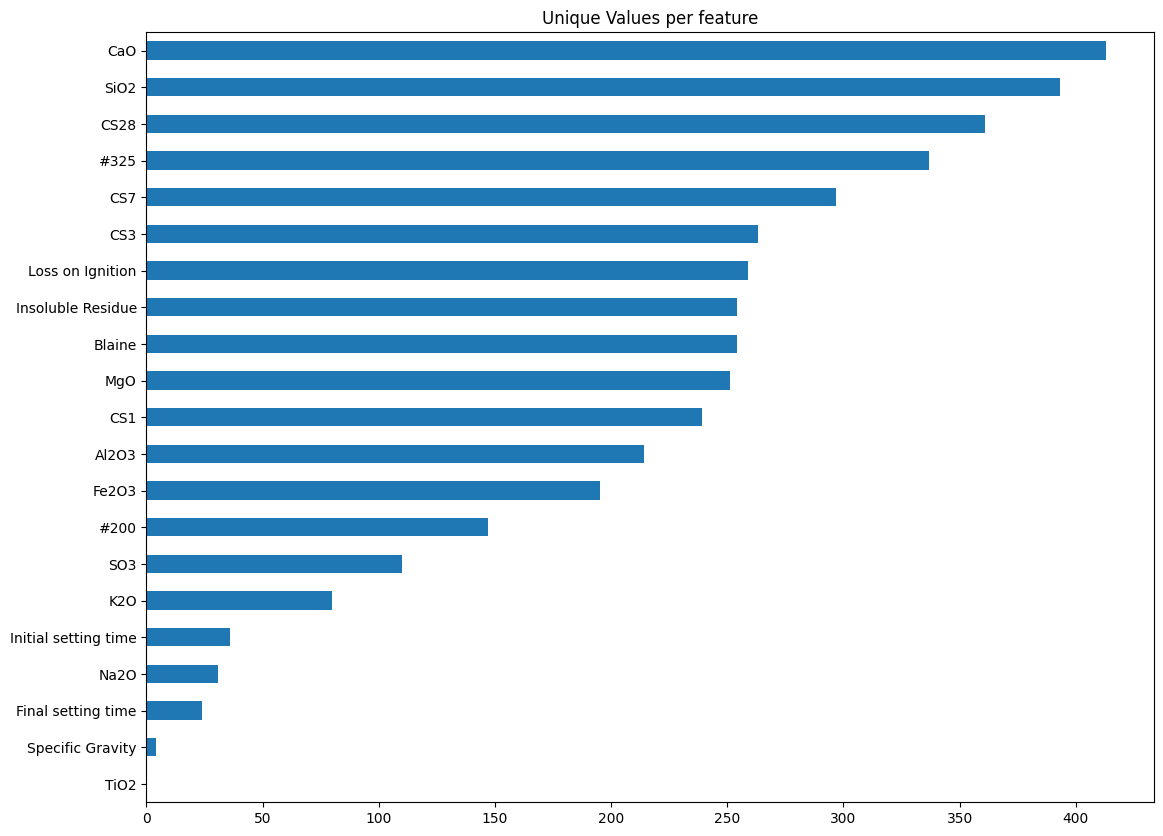

<IPython.core.display.Javascript object>

In [32]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Cement_Type'), Text(1, 0, 'Plant'), Text(2, 0, 'Date')])

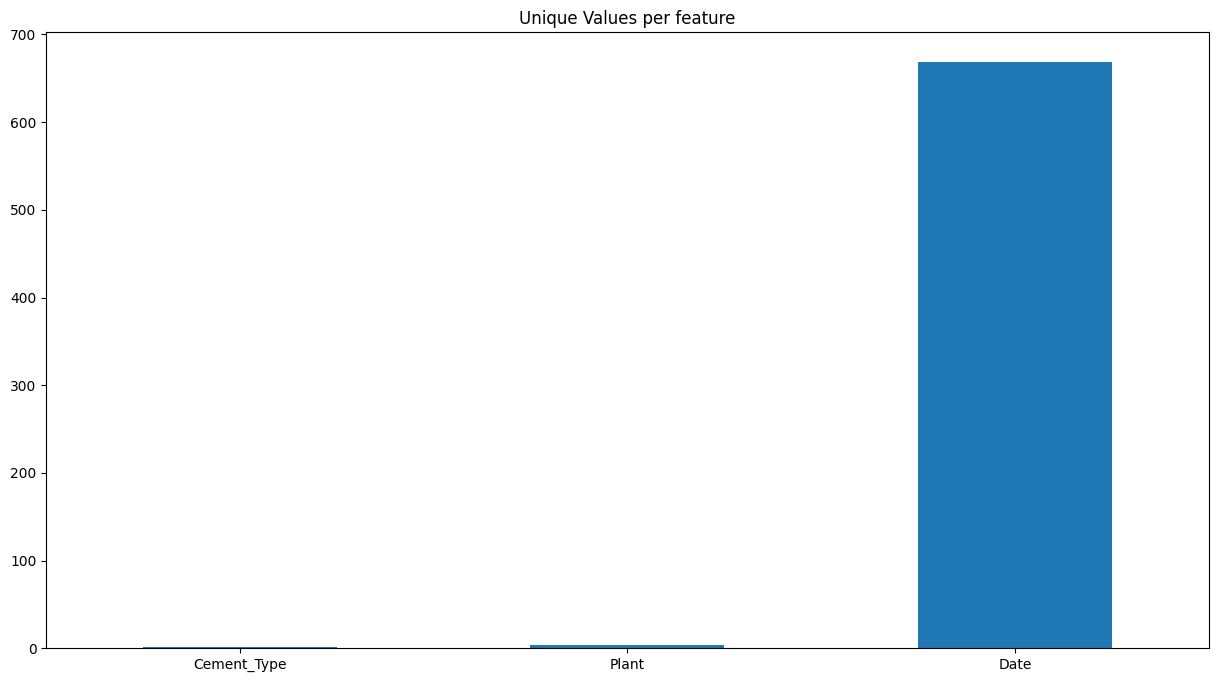

<IPython.core.display.Javascript object>

In [33]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Cement_Type'), Text(1, 0, 'Plant')])

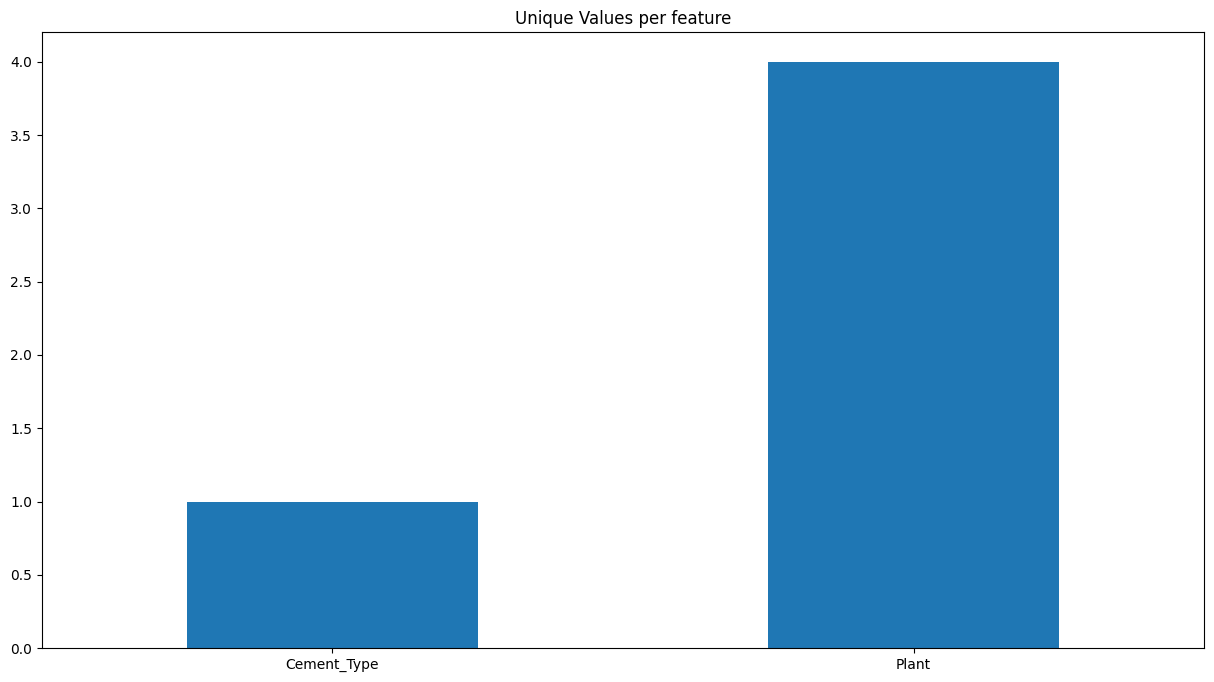

<IPython.core.display.Javascript object>

In [34]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [35]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 18 variables with missing values from a total of 24


<IPython.core.display.Javascript object>

In [36]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                   True
#200                     True
#325                     True
Specific Gravity         True
Final setting time      False
Initial setting time    False
CS1                     False
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [37]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [38]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 24 artists>

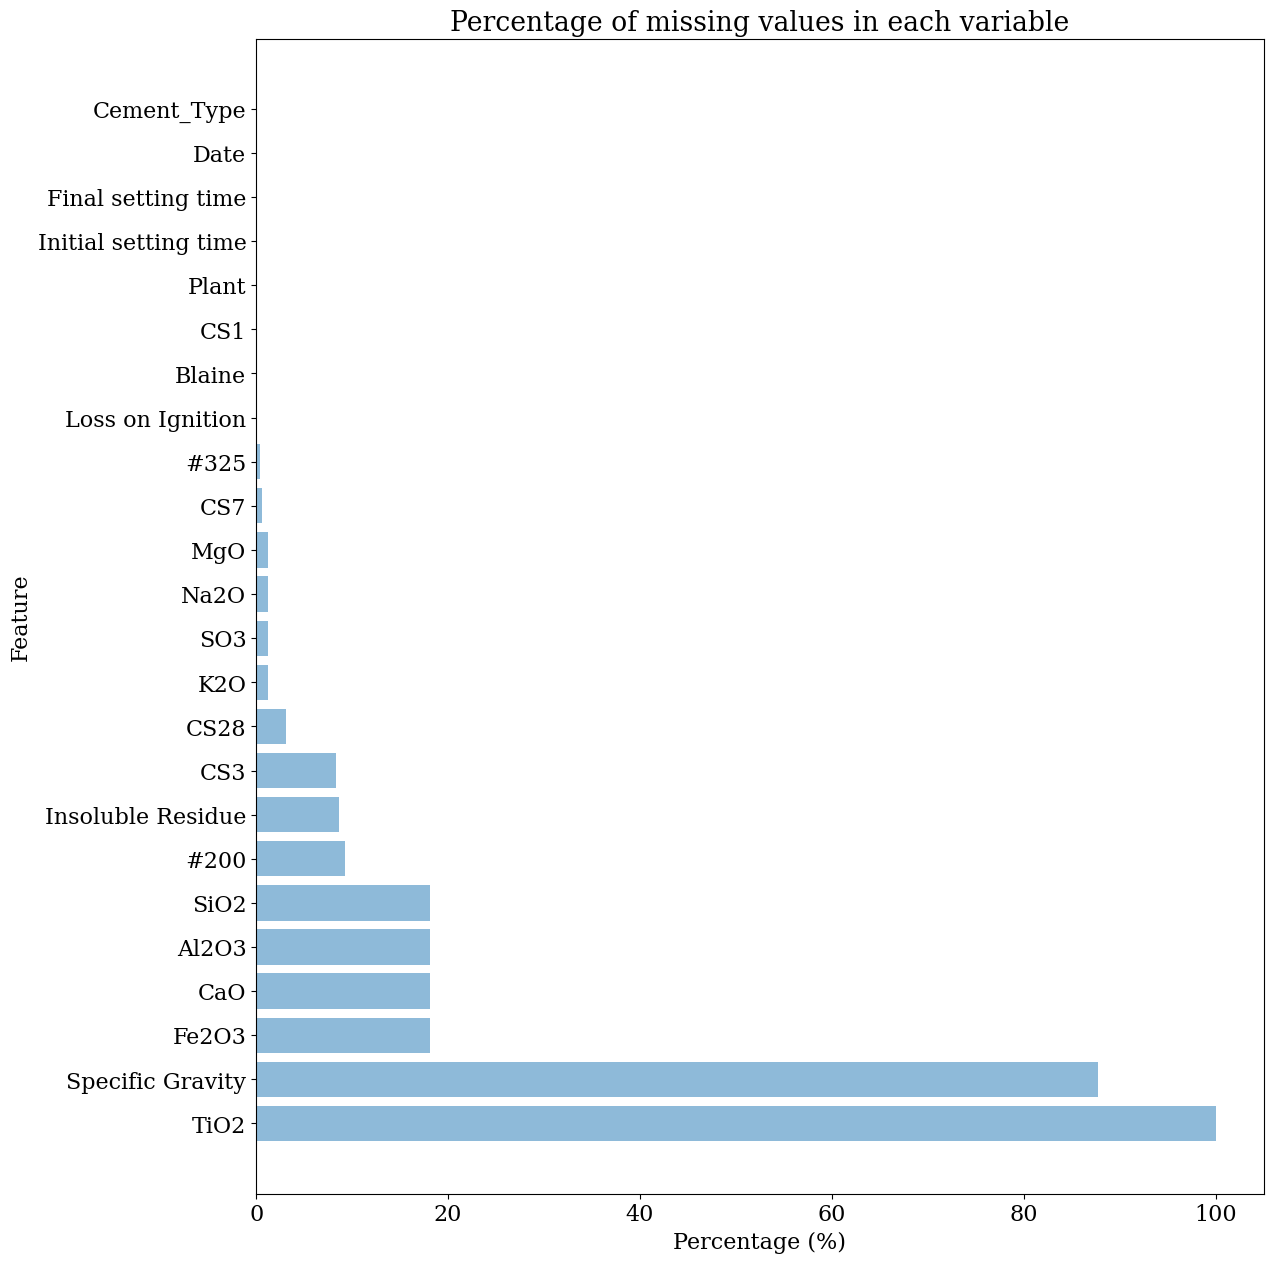

<IPython.core.display.Javascript object>

In [39]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

### Missing values per plant

In [40]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [41]:
df_f = df[df["Plant"] != "M"]

(df_f.isna().sum() / df_f.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [42]:
df_f = df[df["Plant"] == "M"]

(df_f.isna().sum() / df_f.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [43]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

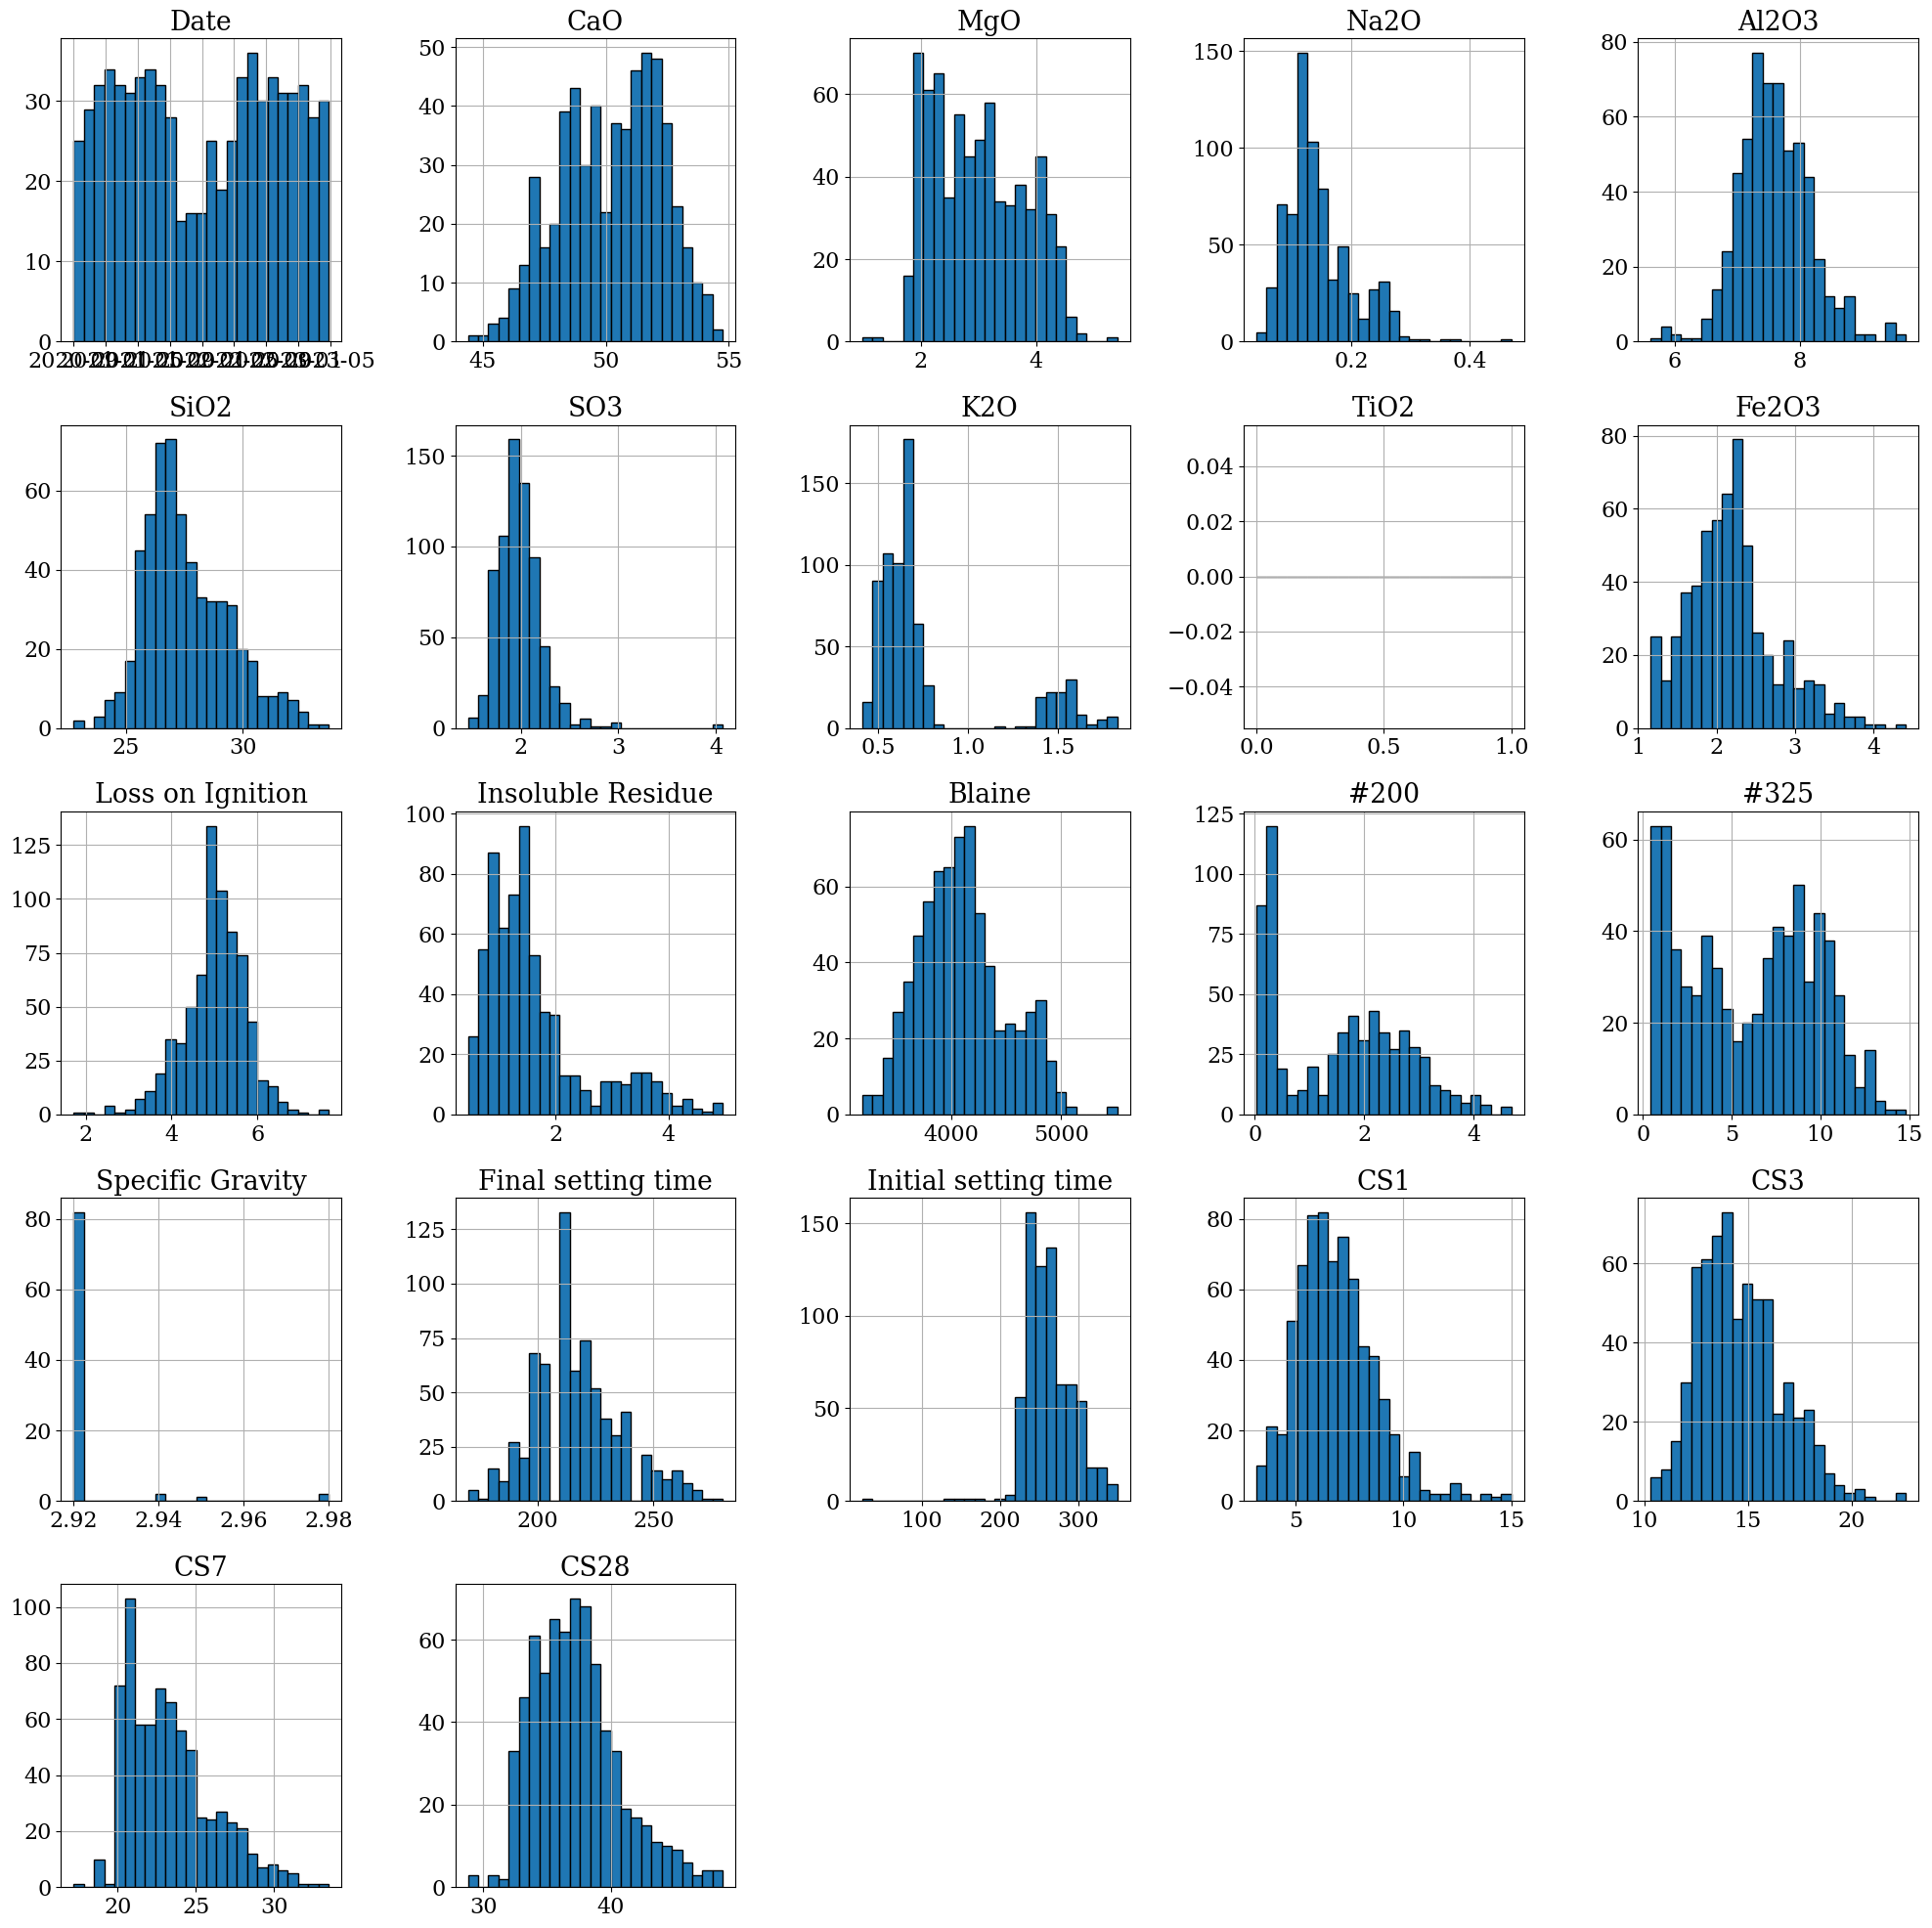

<IPython.core.display.Javascript object>

In [44]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

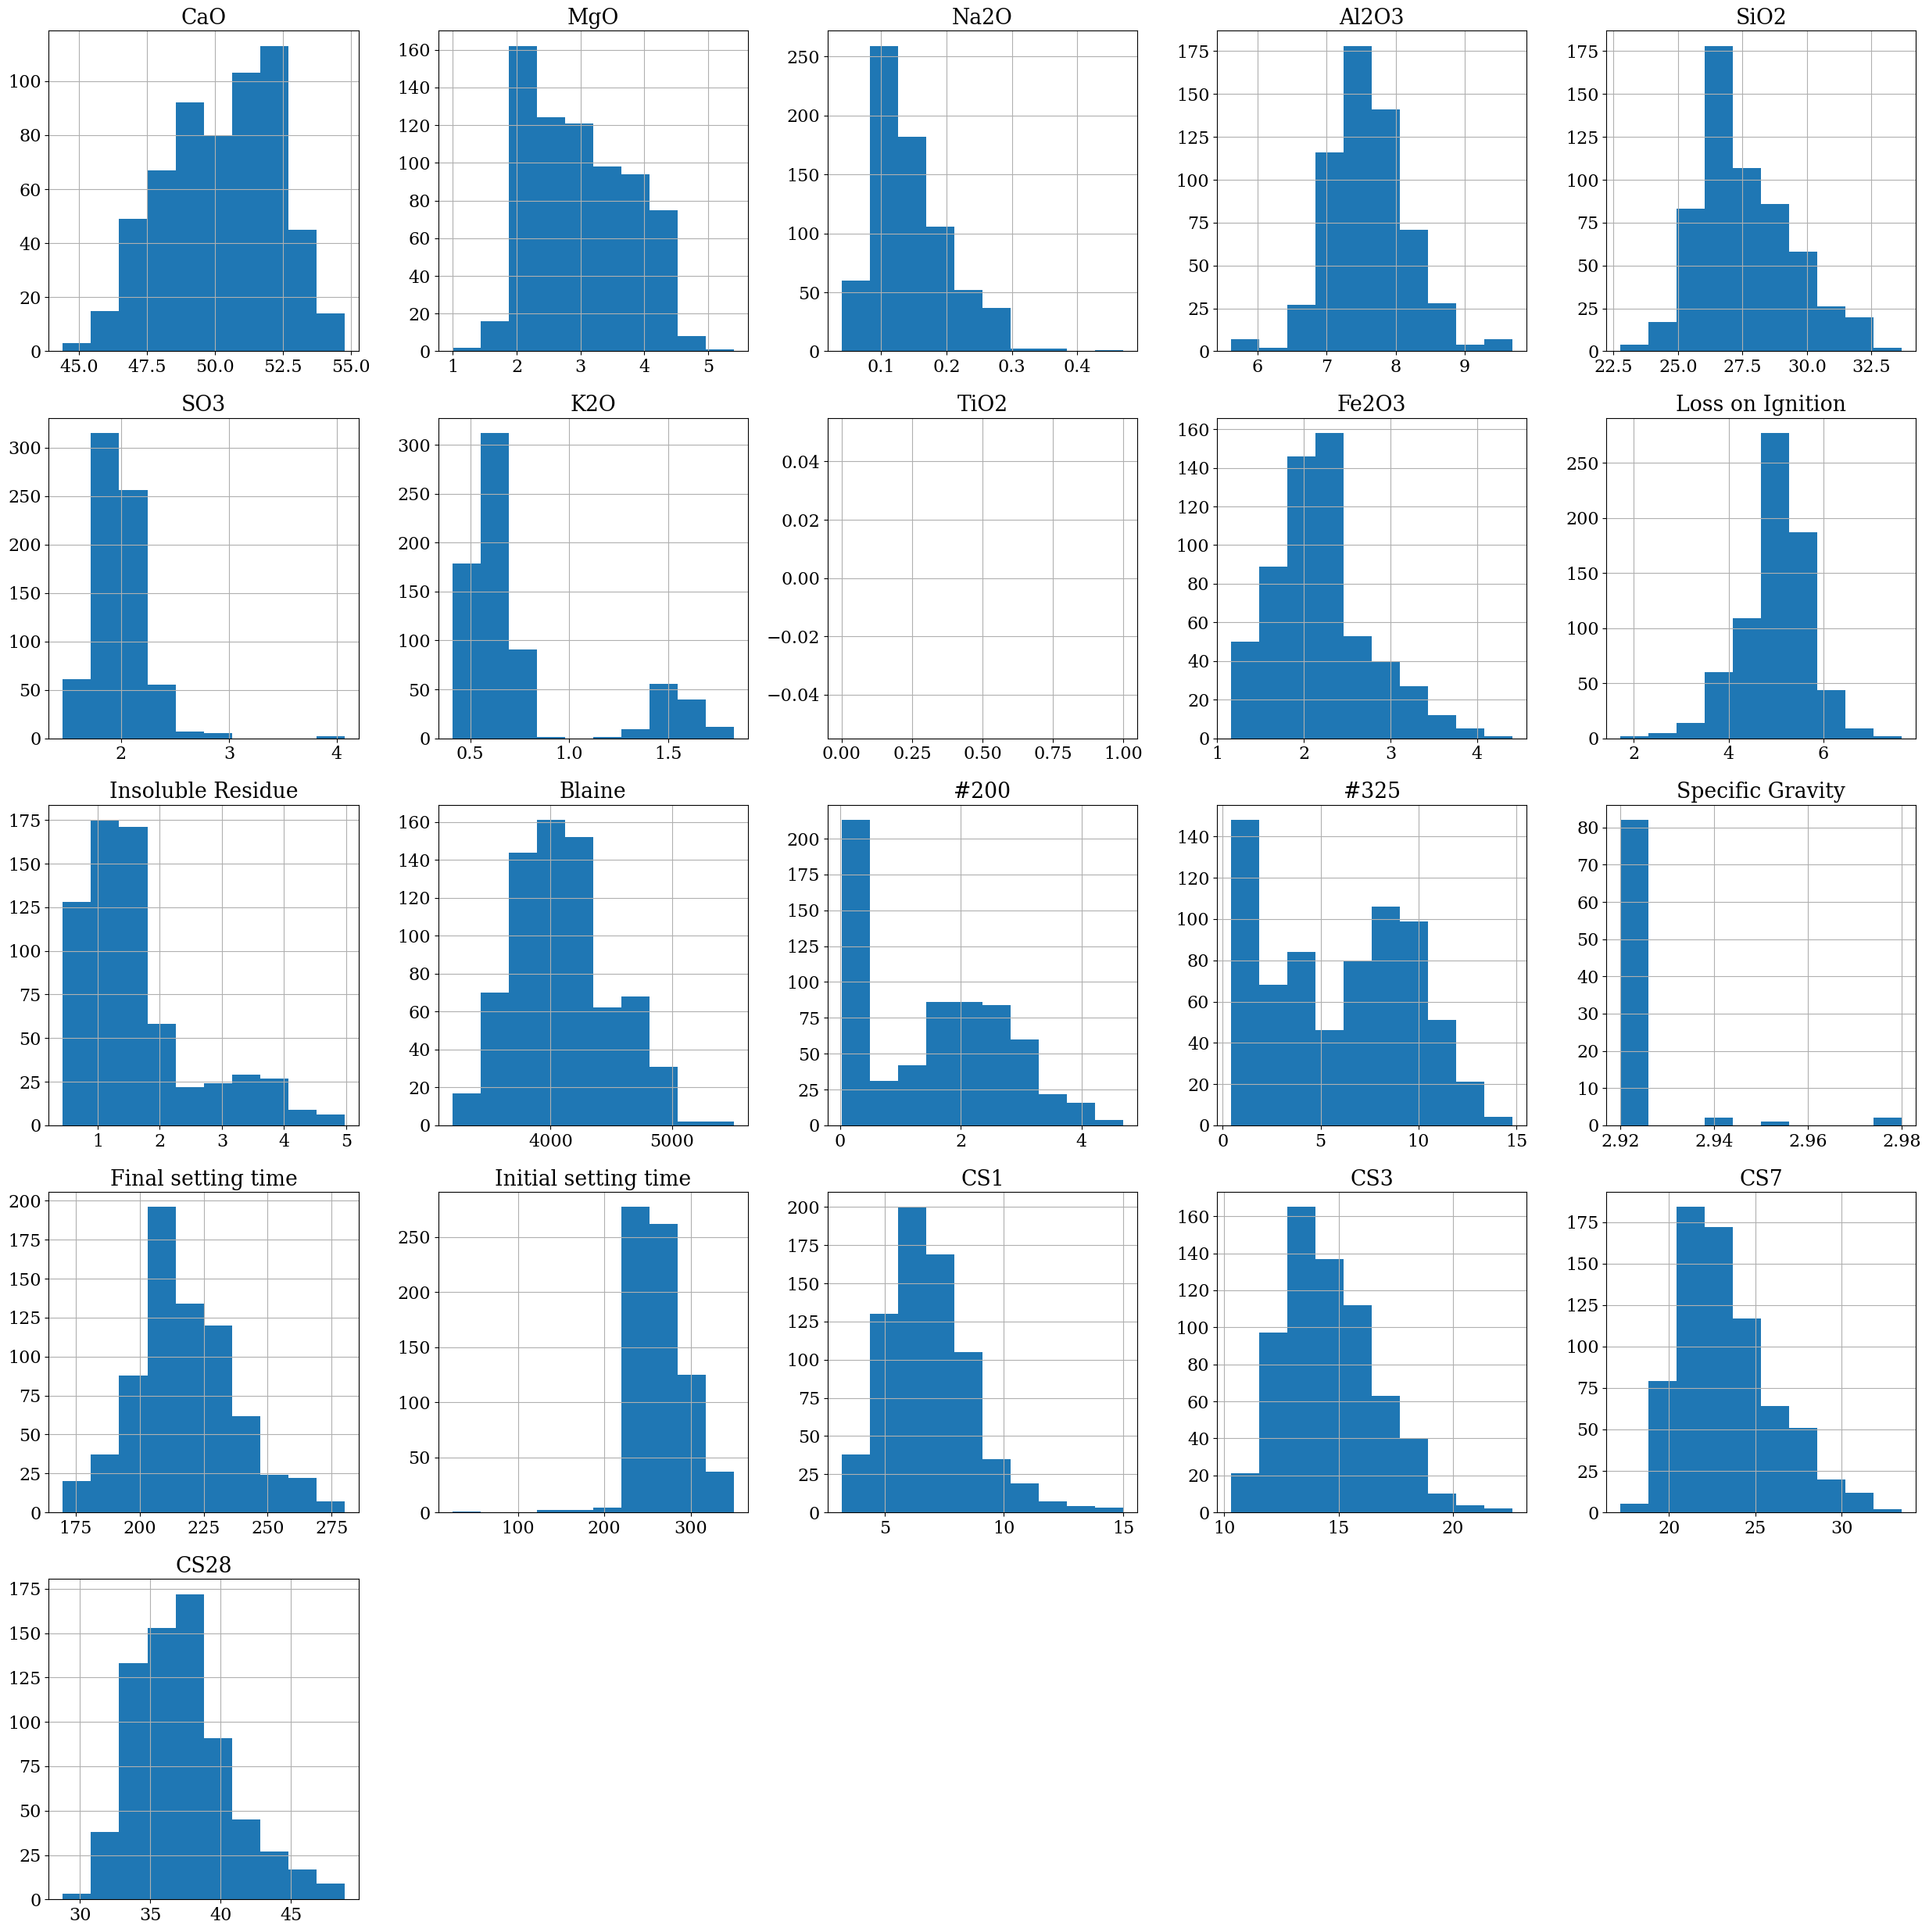

<IPython.core.display.Javascript object>

In [45]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

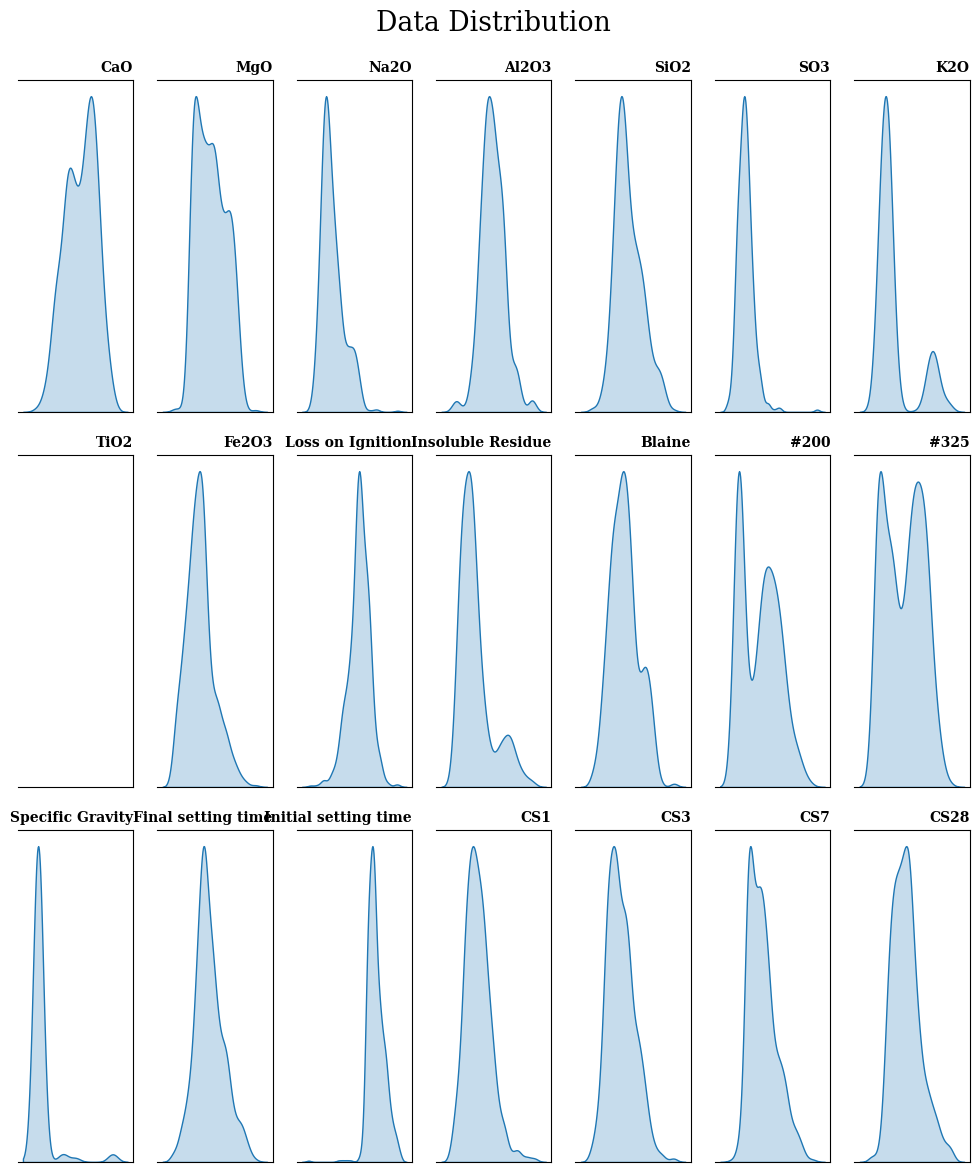

<IPython.core.display.Javascript object>

In [46]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

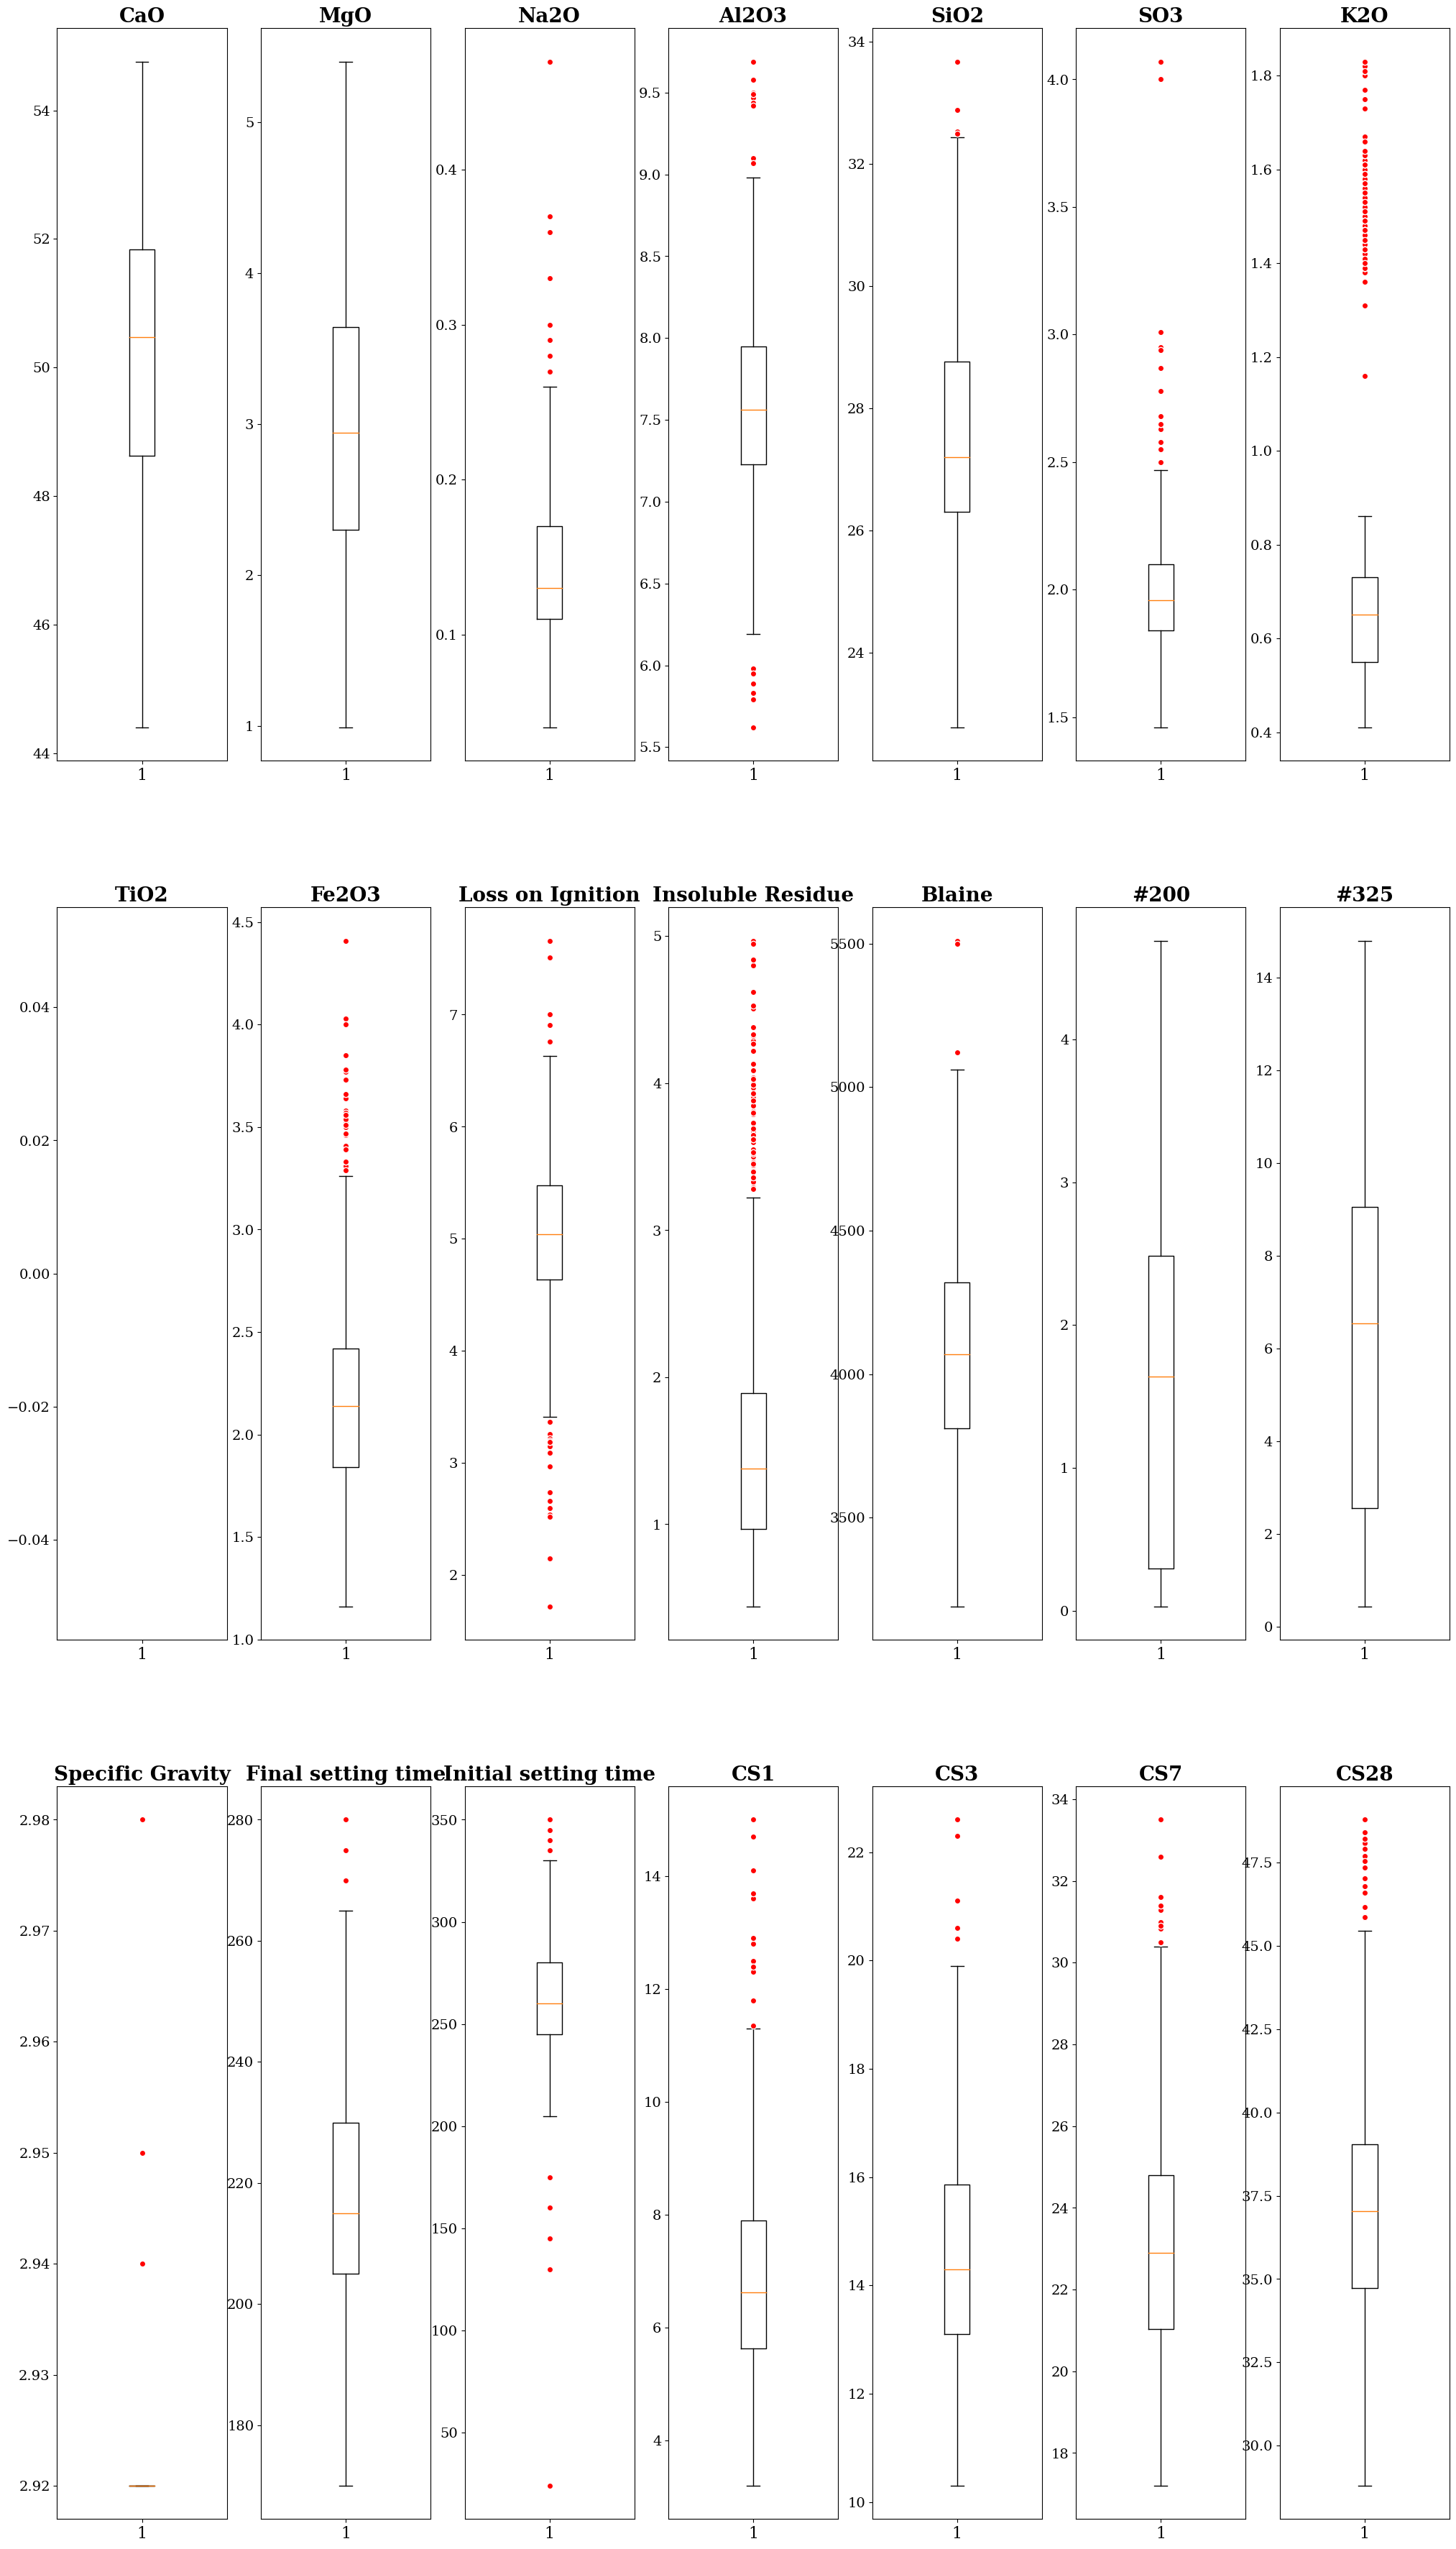

<IPython.core.display.Javascript object>

In [47]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

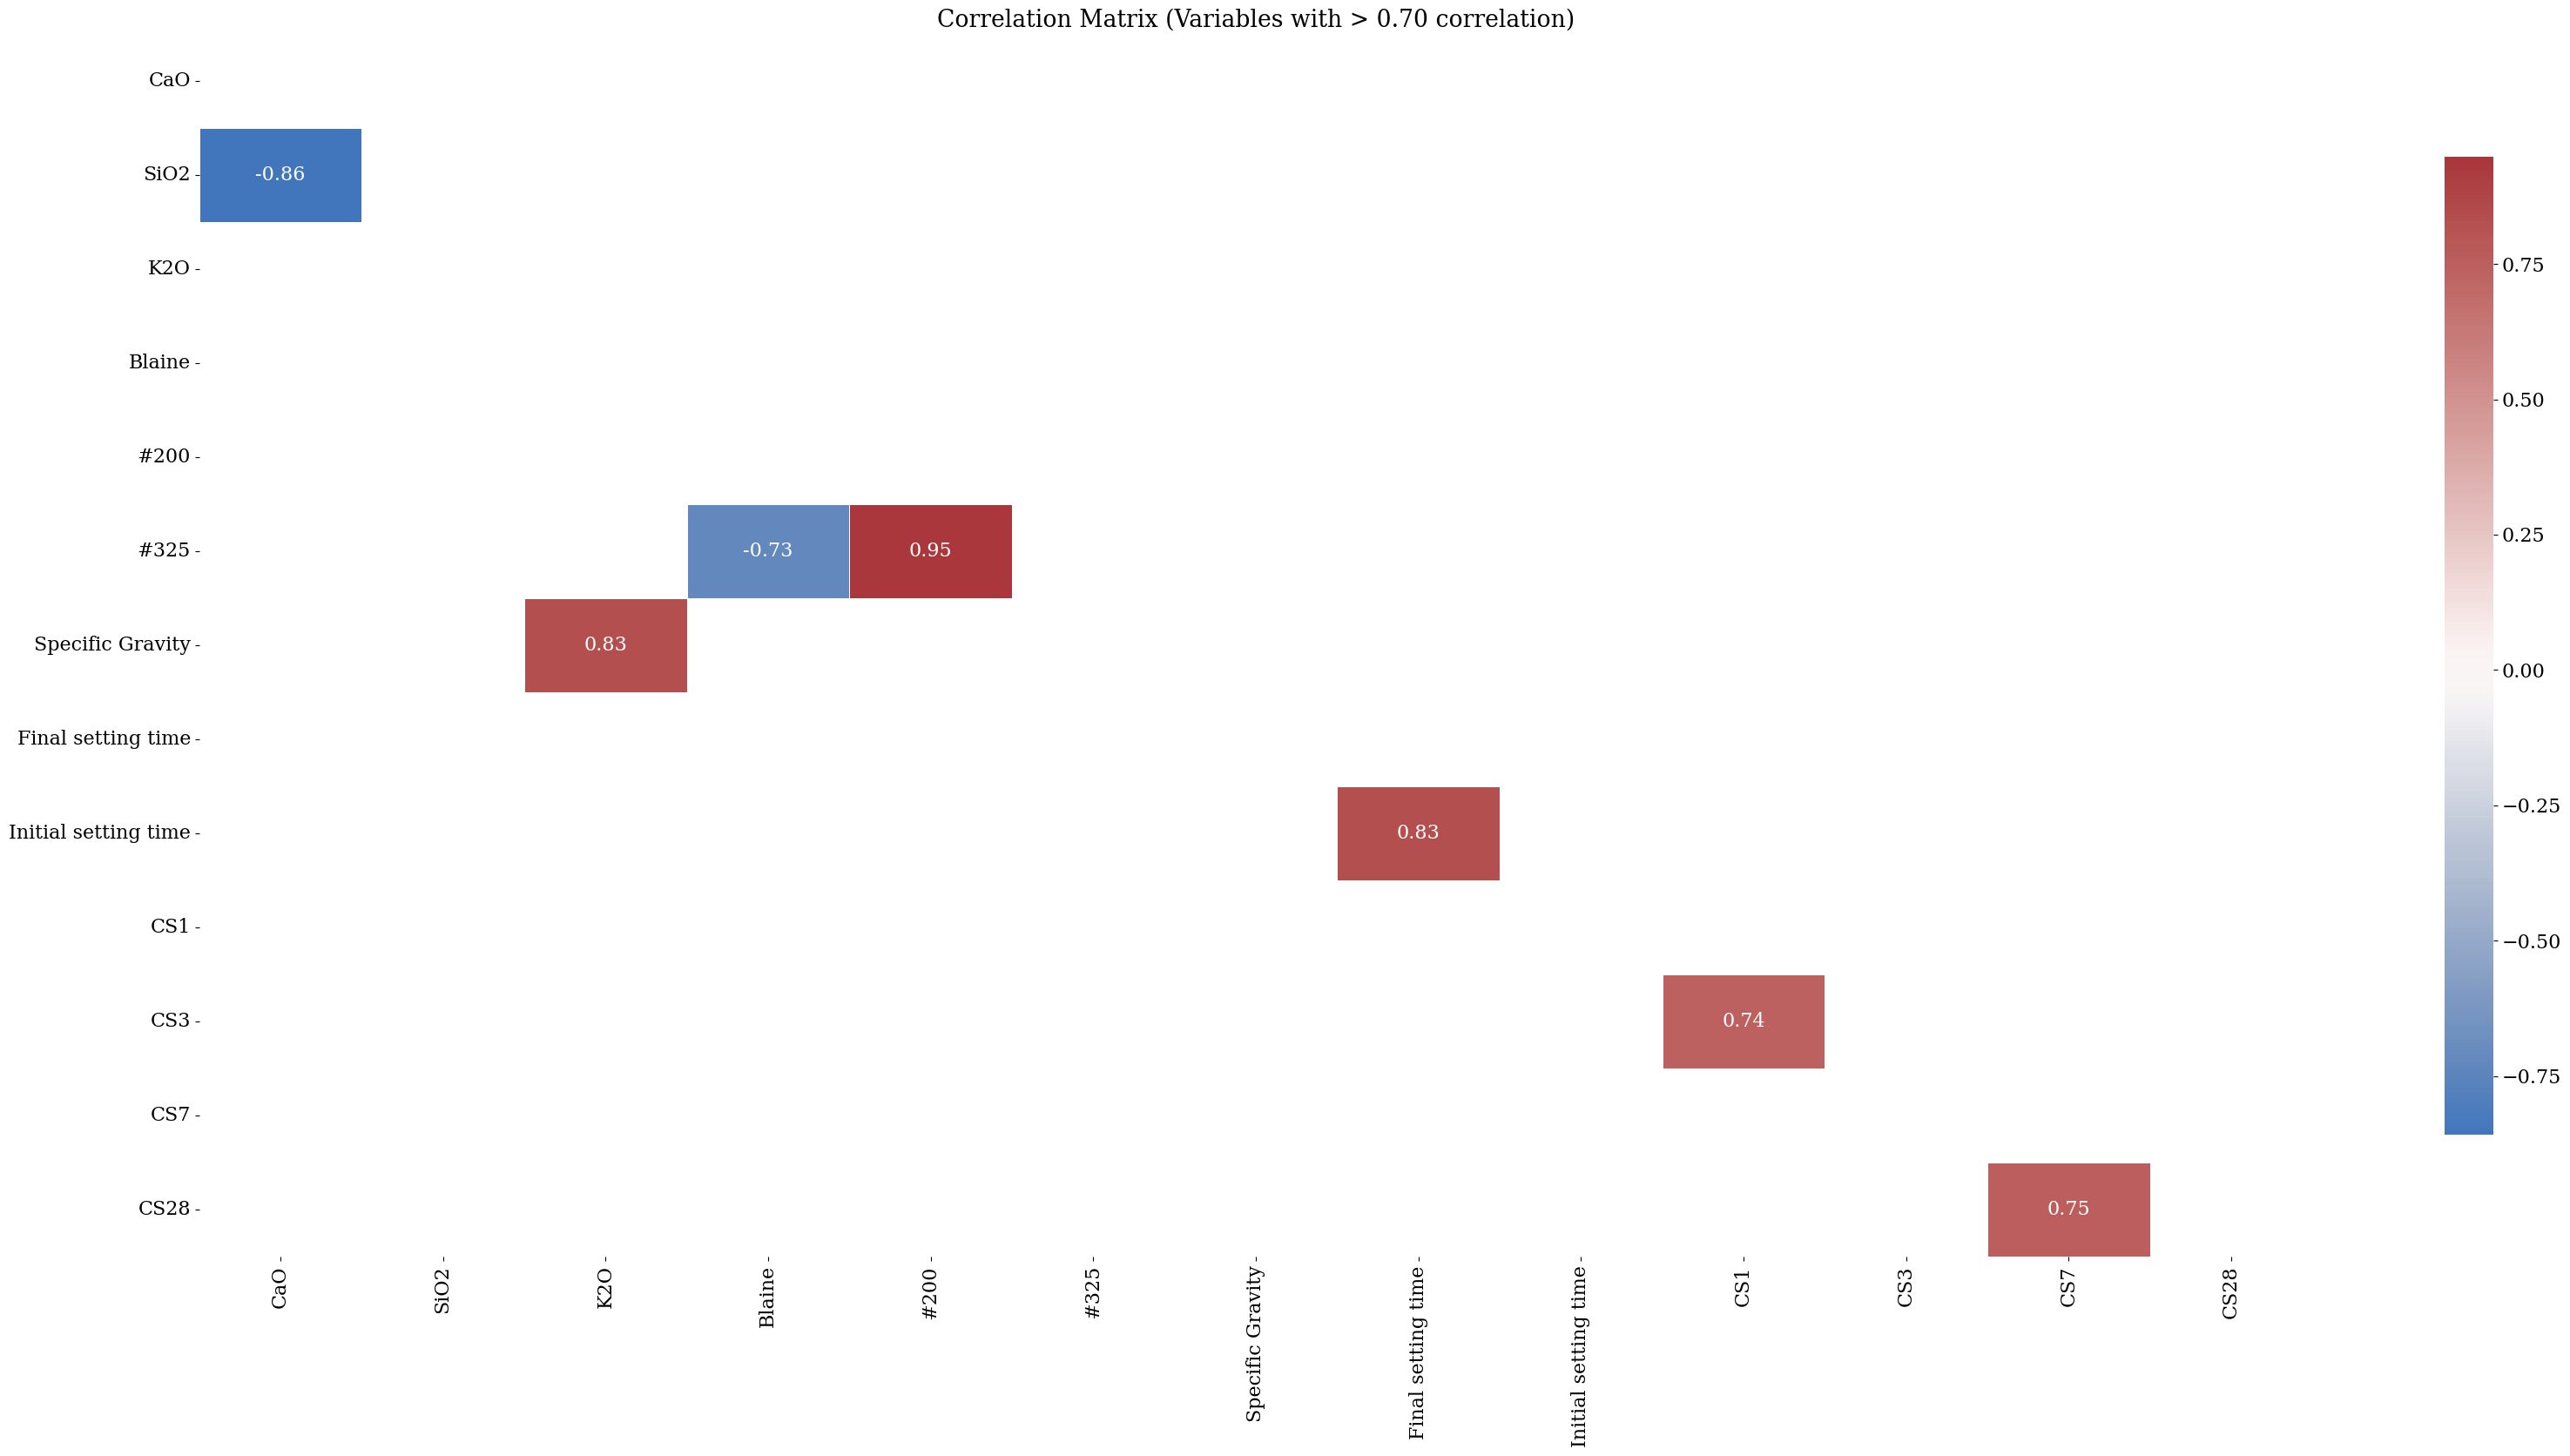

<IPython.core.display.Javascript object>

In [48]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [49]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

#200                #325                    0.948433
CaO                 SiO2                    0.858183
Final setting time  Initial setting time    0.833908
K2O                 Specific Gravity        0.831365
CS7                 CS28                    0.753022
CS1                 CS3                     0.737882
Blaine              #325                    0.725878
dtype: float64

<IPython.core.display.Javascript object>

In [50]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.753022
Fe2O3                 CS28    0.493132
Blaine                CS28    0.448167
Insoluble Residue     CS28    0.403288
#200                  CS28    0.385351
CS3                   CS28    0.381460
#325                  CS28    0.377439
Na2O                  CS28    0.326017
MgO                   CS28    0.285662
Loss on Ignition      CS28    0.259838
Al2O3                 CS28    0.235141
K2O                   CS28    0.229703
SO3                   CS28    0.148098
CS1                   CS28    0.095210
Specific Gravity      CS28    0.047764
Final setting time    CS28    0.041684
Initial setting time  CS28    0.018611
CaO                   CS28    0.015056
SiO2                  CS28    0.011602
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

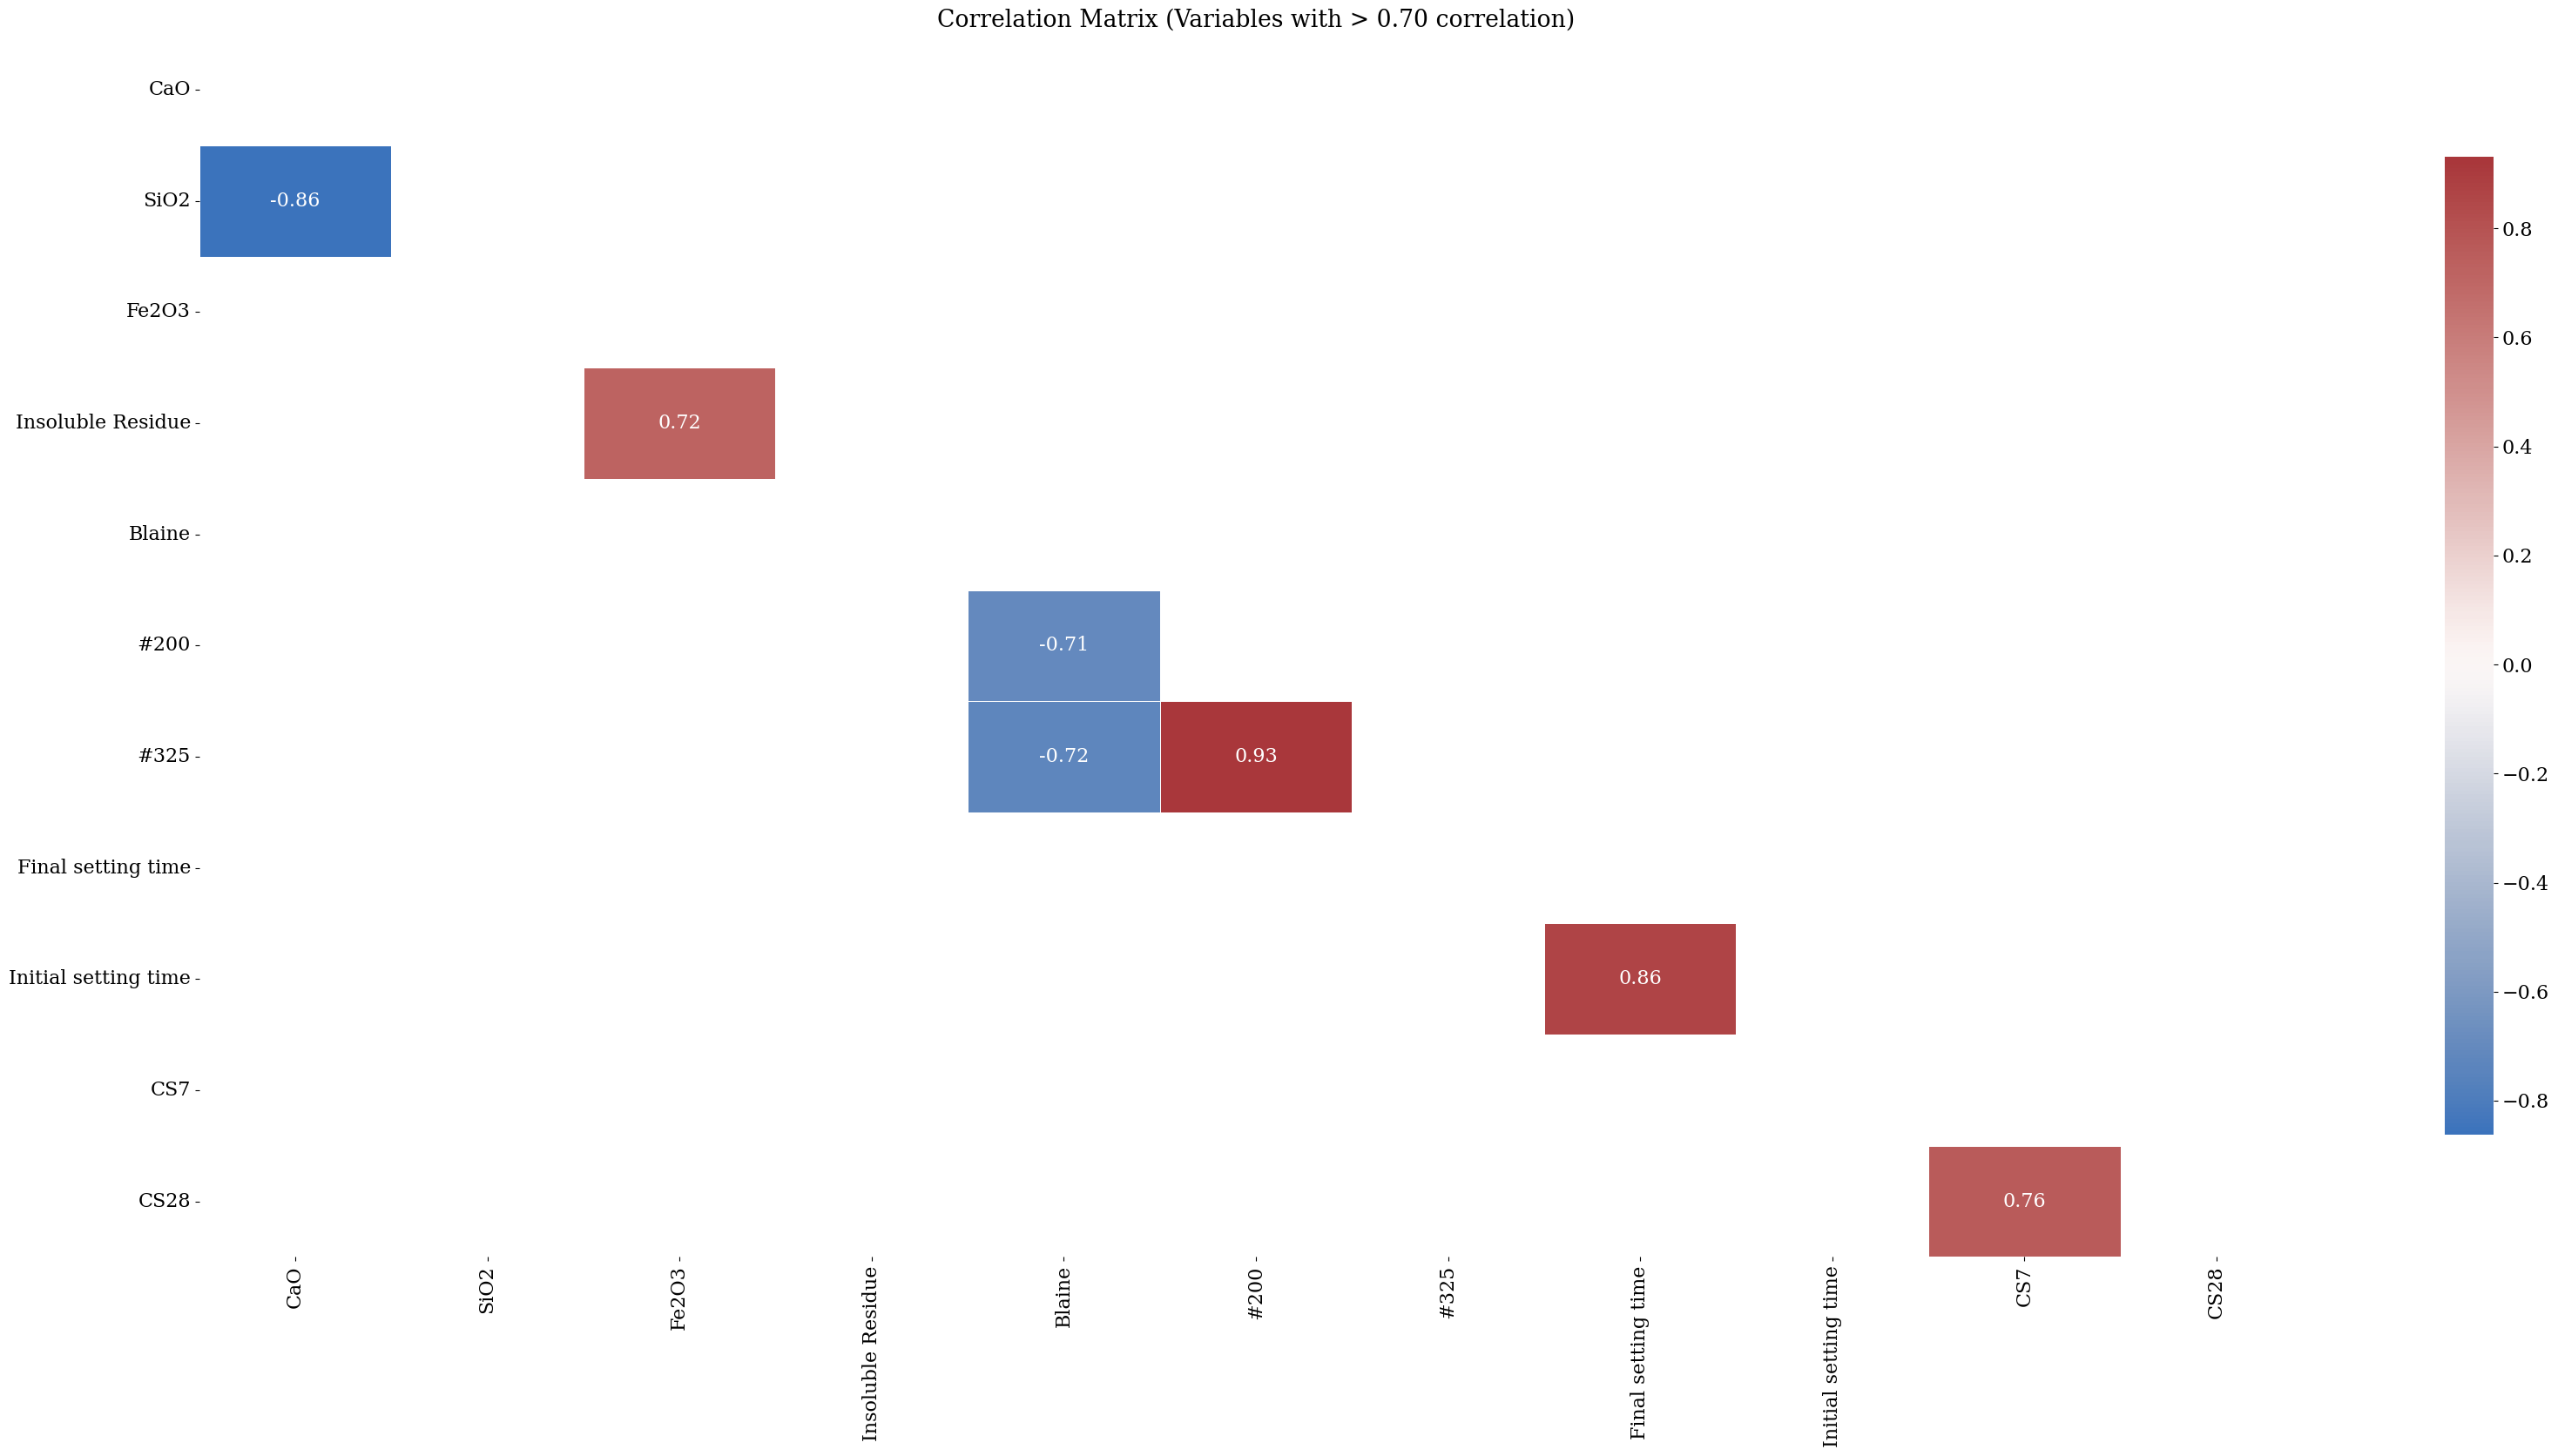

<IPython.core.display.Javascript object>

In [51]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [52]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

#200                #325                    0.931857
Final setting time  Initial setting time    0.863718
CaO                 SiO2                    0.862362
CS7                 CS28                    0.760109
Blaine              #325                    0.723531
Fe2O3               Insoluble Residue       0.721786
Blaine              #200                    0.707583
dtype: float64

<IPython.core.display.Javascript object>

In [53]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.760109
Fe2O3                 CS28    0.516512
Insoluble Residue     CS28    0.485285
CS3                   CS28    0.427740
Blaine                CS28    0.378412
#200                  CS28    0.372957
K2O                   CS28    0.365782
#325                  CS28    0.353255
Na2O                  CS28    0.284368
MgO                   CS28    0.262140
Loss on Ignition      CS28    0.258696
Al2O3                 CS28    0.232918
SO3                   CS28    0.169489
Specific Gravity      CS28    0.087088
CS1                   CS28    0.072665
SiO2                  CS28    0.048289
CaO                   CS28    0.038093
Final setting time    CS28    0.033021
Initial setting time  CS28    0.011397
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

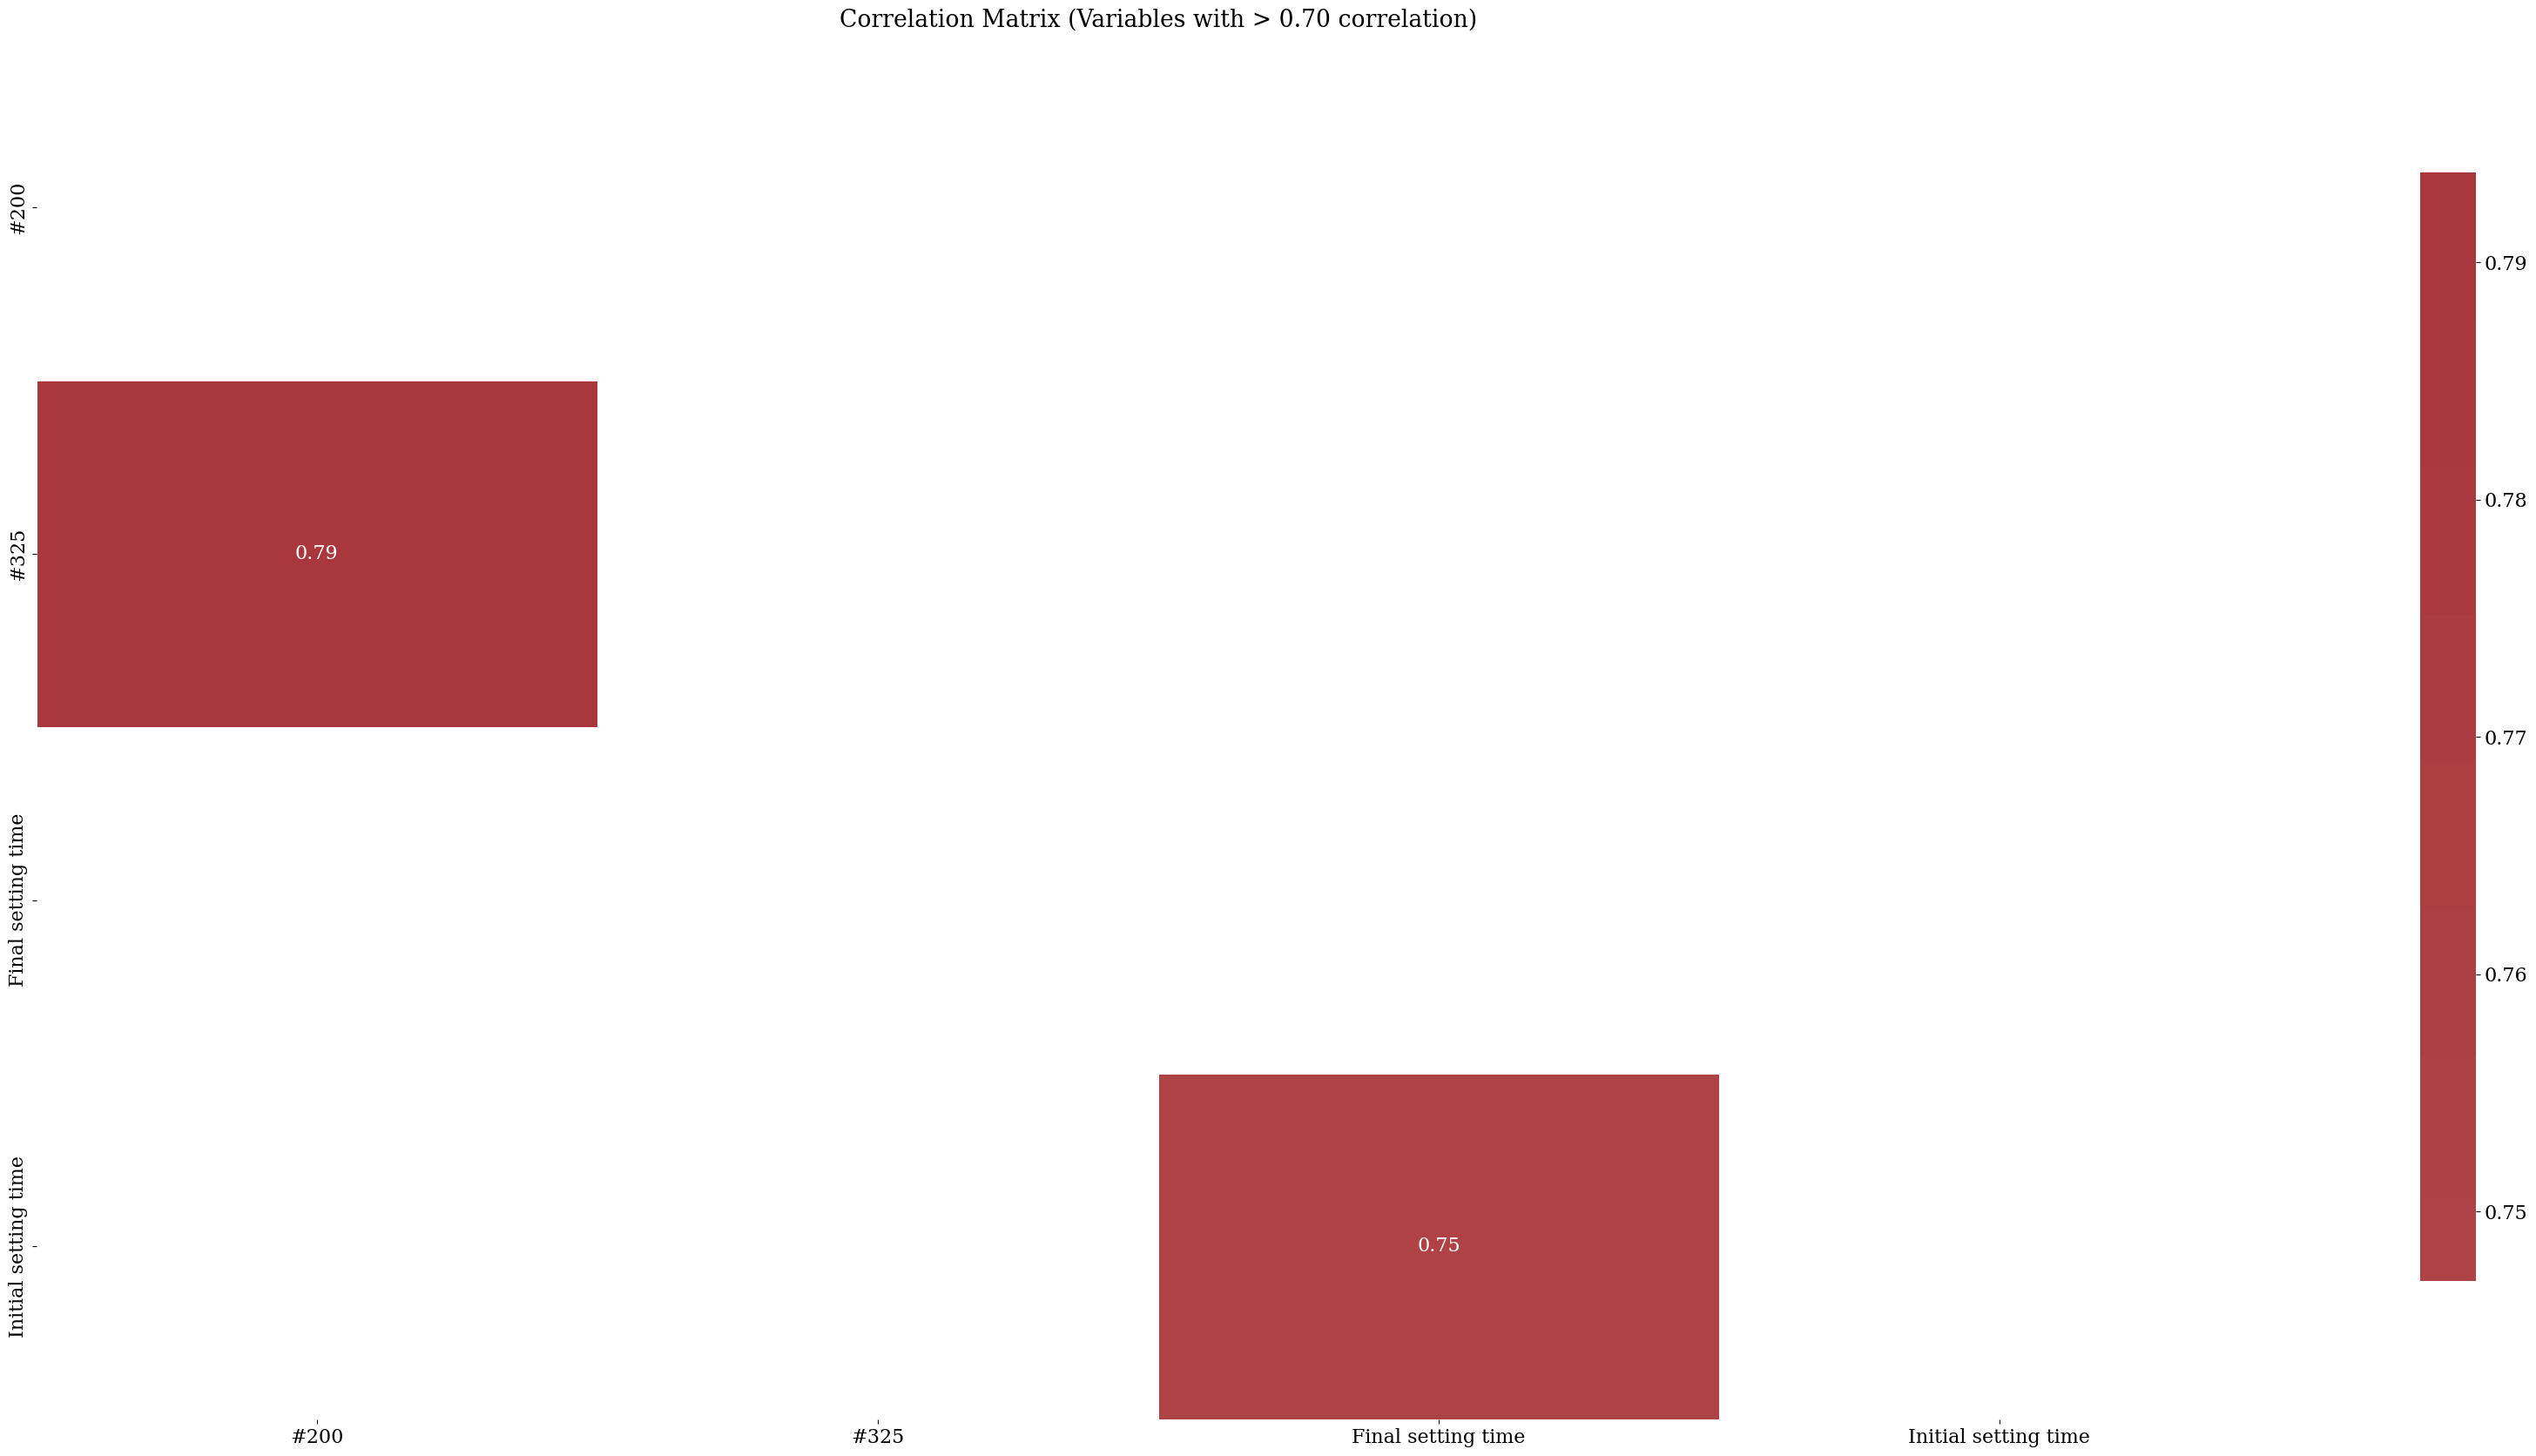

<IPython.core.display.Javascript object>

In [54]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [55]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

#200                #325                    0.793773
Final setting time  Initial setting time    0.747060
dtype: float64

<IPython.core.display.Javascript object>

In [56]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.562505
Fe2O3                 CS28    0.350485
Insoluble Residue     CS28    0.326347
CS3                   CS28    0.296559
#200                  CS28    0.263897
K2O                   CS28    0.259993
Blaine                CS28    0.256709
#325                  CS28    0.240728
Na2O                  CS28    0.194884
MgO                   CS28    0.182948
Loss on Ignition      CS28    0.178153
Al2O3                 CS28    0.154345
SO3                   CS28    0.116277
Specific Gravity      CS28    0.072716
CS1                   CS28    0.049305
SiO2                  CS28    0.039166
CaO                   CS28    0.029066
Final setting time    CS28    0.024599
Initial setting time  CS28    0.009732
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

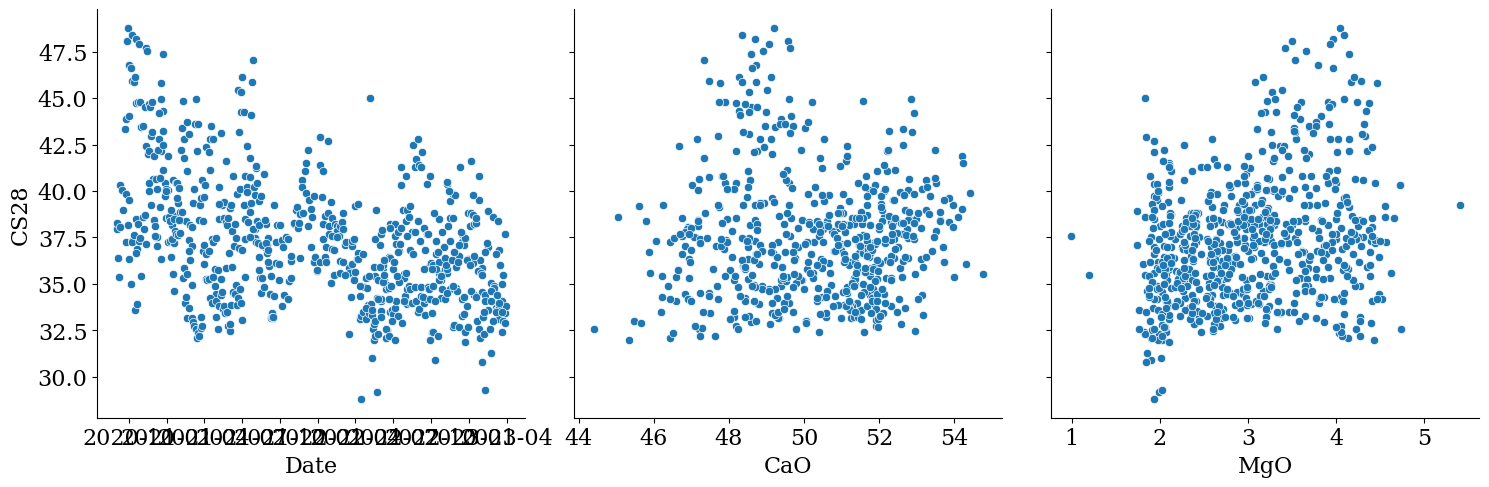

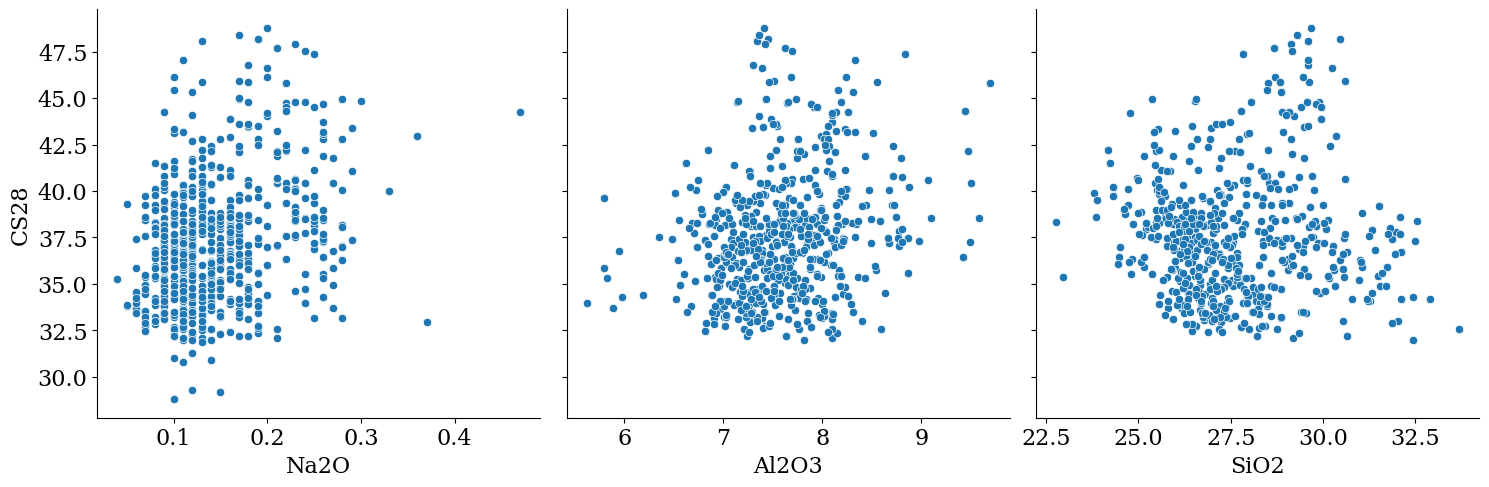

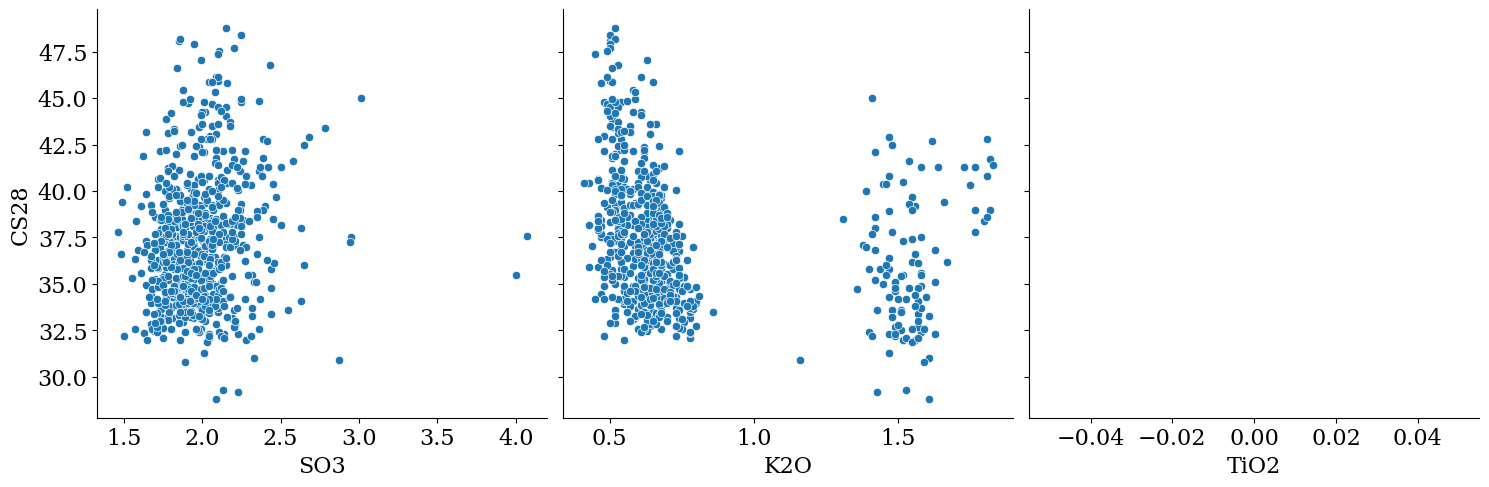

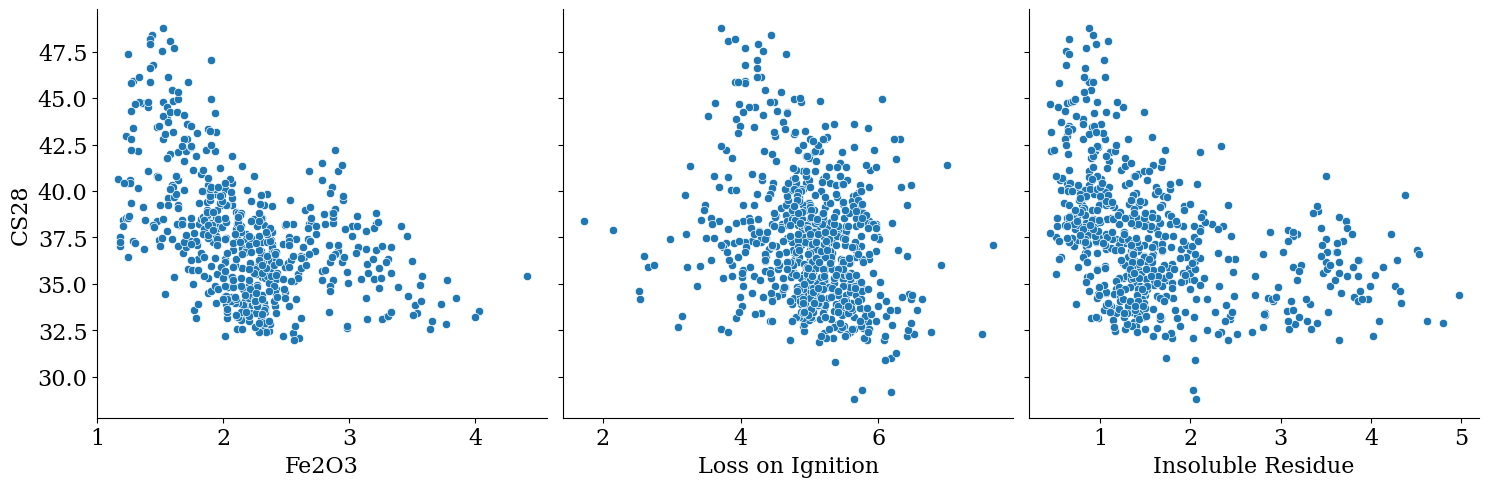

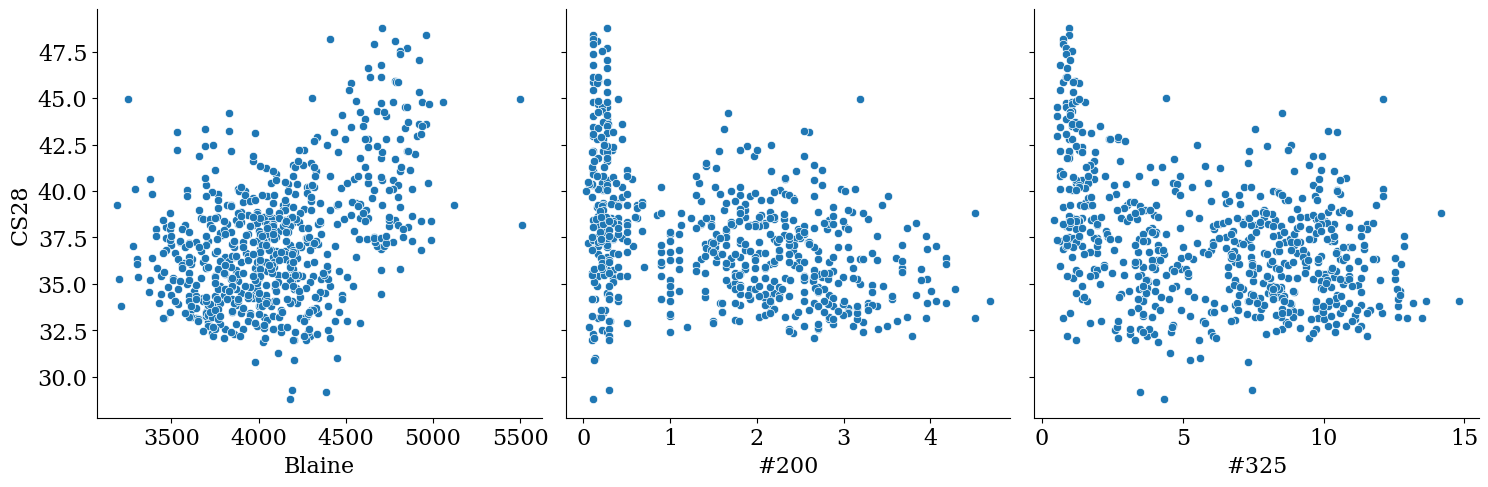

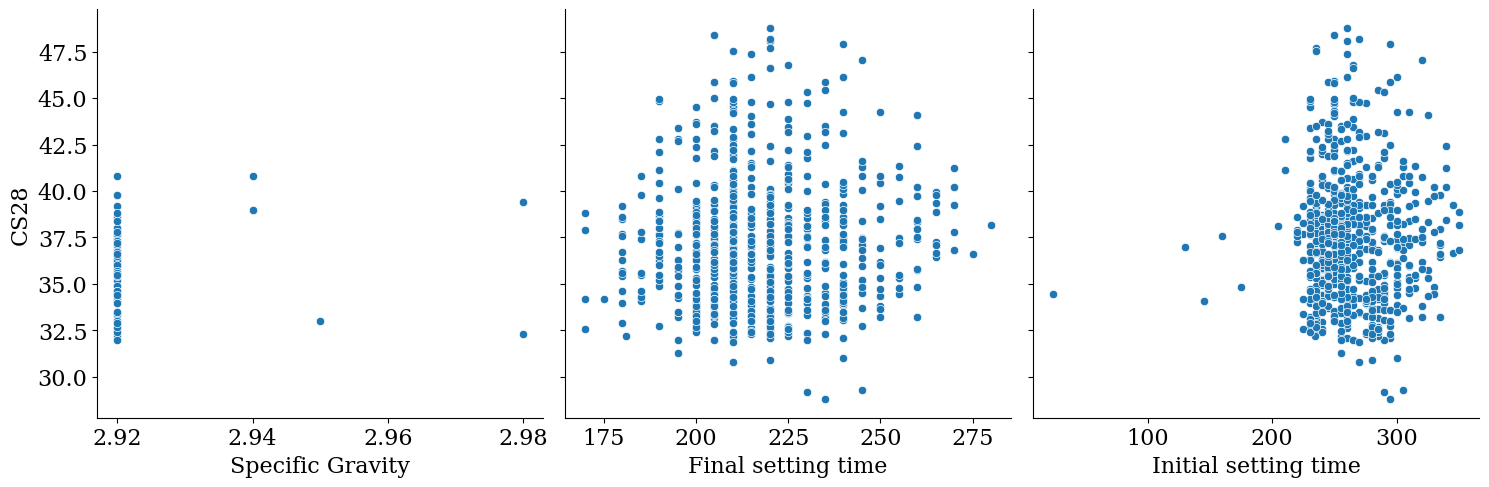

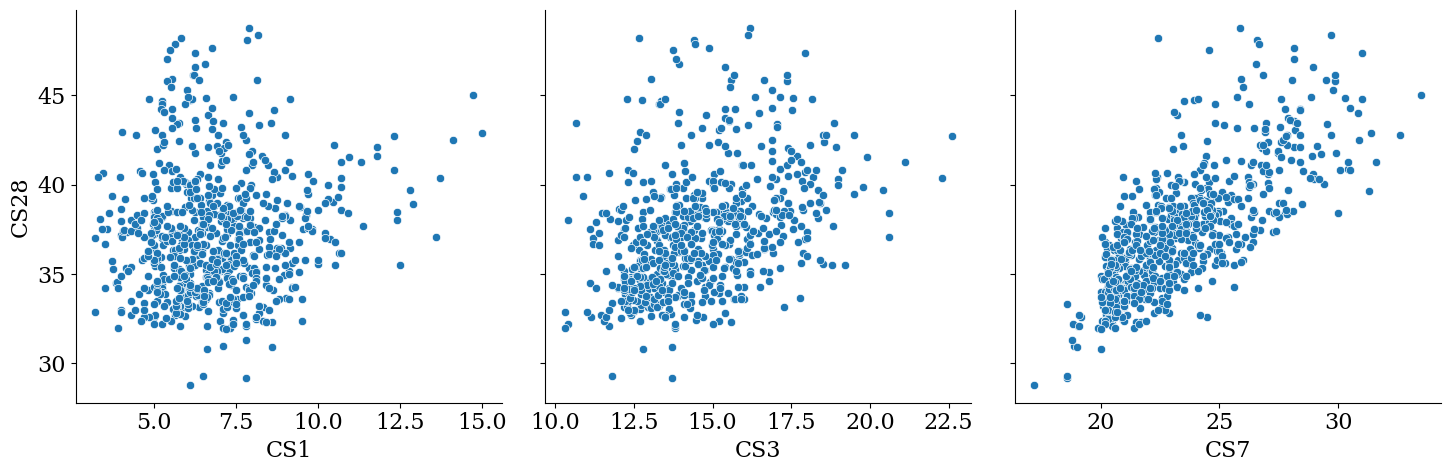

<IPython.core.display.Javascript object>

In [57]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [58]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

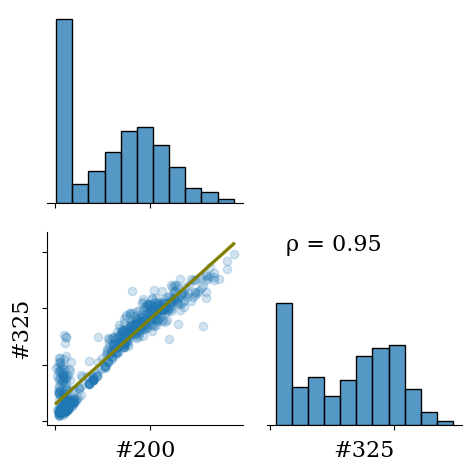

<IPython.core.display.Javascript object>

In [59]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [60]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

476 valid days out of 496


<IPython.core.display.Javascript object>

In [61]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2020, 2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [62]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2020: {9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4}}

<IPython.core.display.Javascript object>

In [63]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2020  9        15
      10       16
      11       15
      12       15
2021  1        14
      2        18
      3        16
      4        17
      5        17
      6        20
      7        18
      8        18
      9        15
      10       10
      11       12
      12       13
2022  1        13
      2        12
      3        16
      4        12
      5        17
      6        18
      7        16
      8        18
      9        18
      10       15
      11       15
      12       17
2023  1        15
      2        13
      3        17
      4        15
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

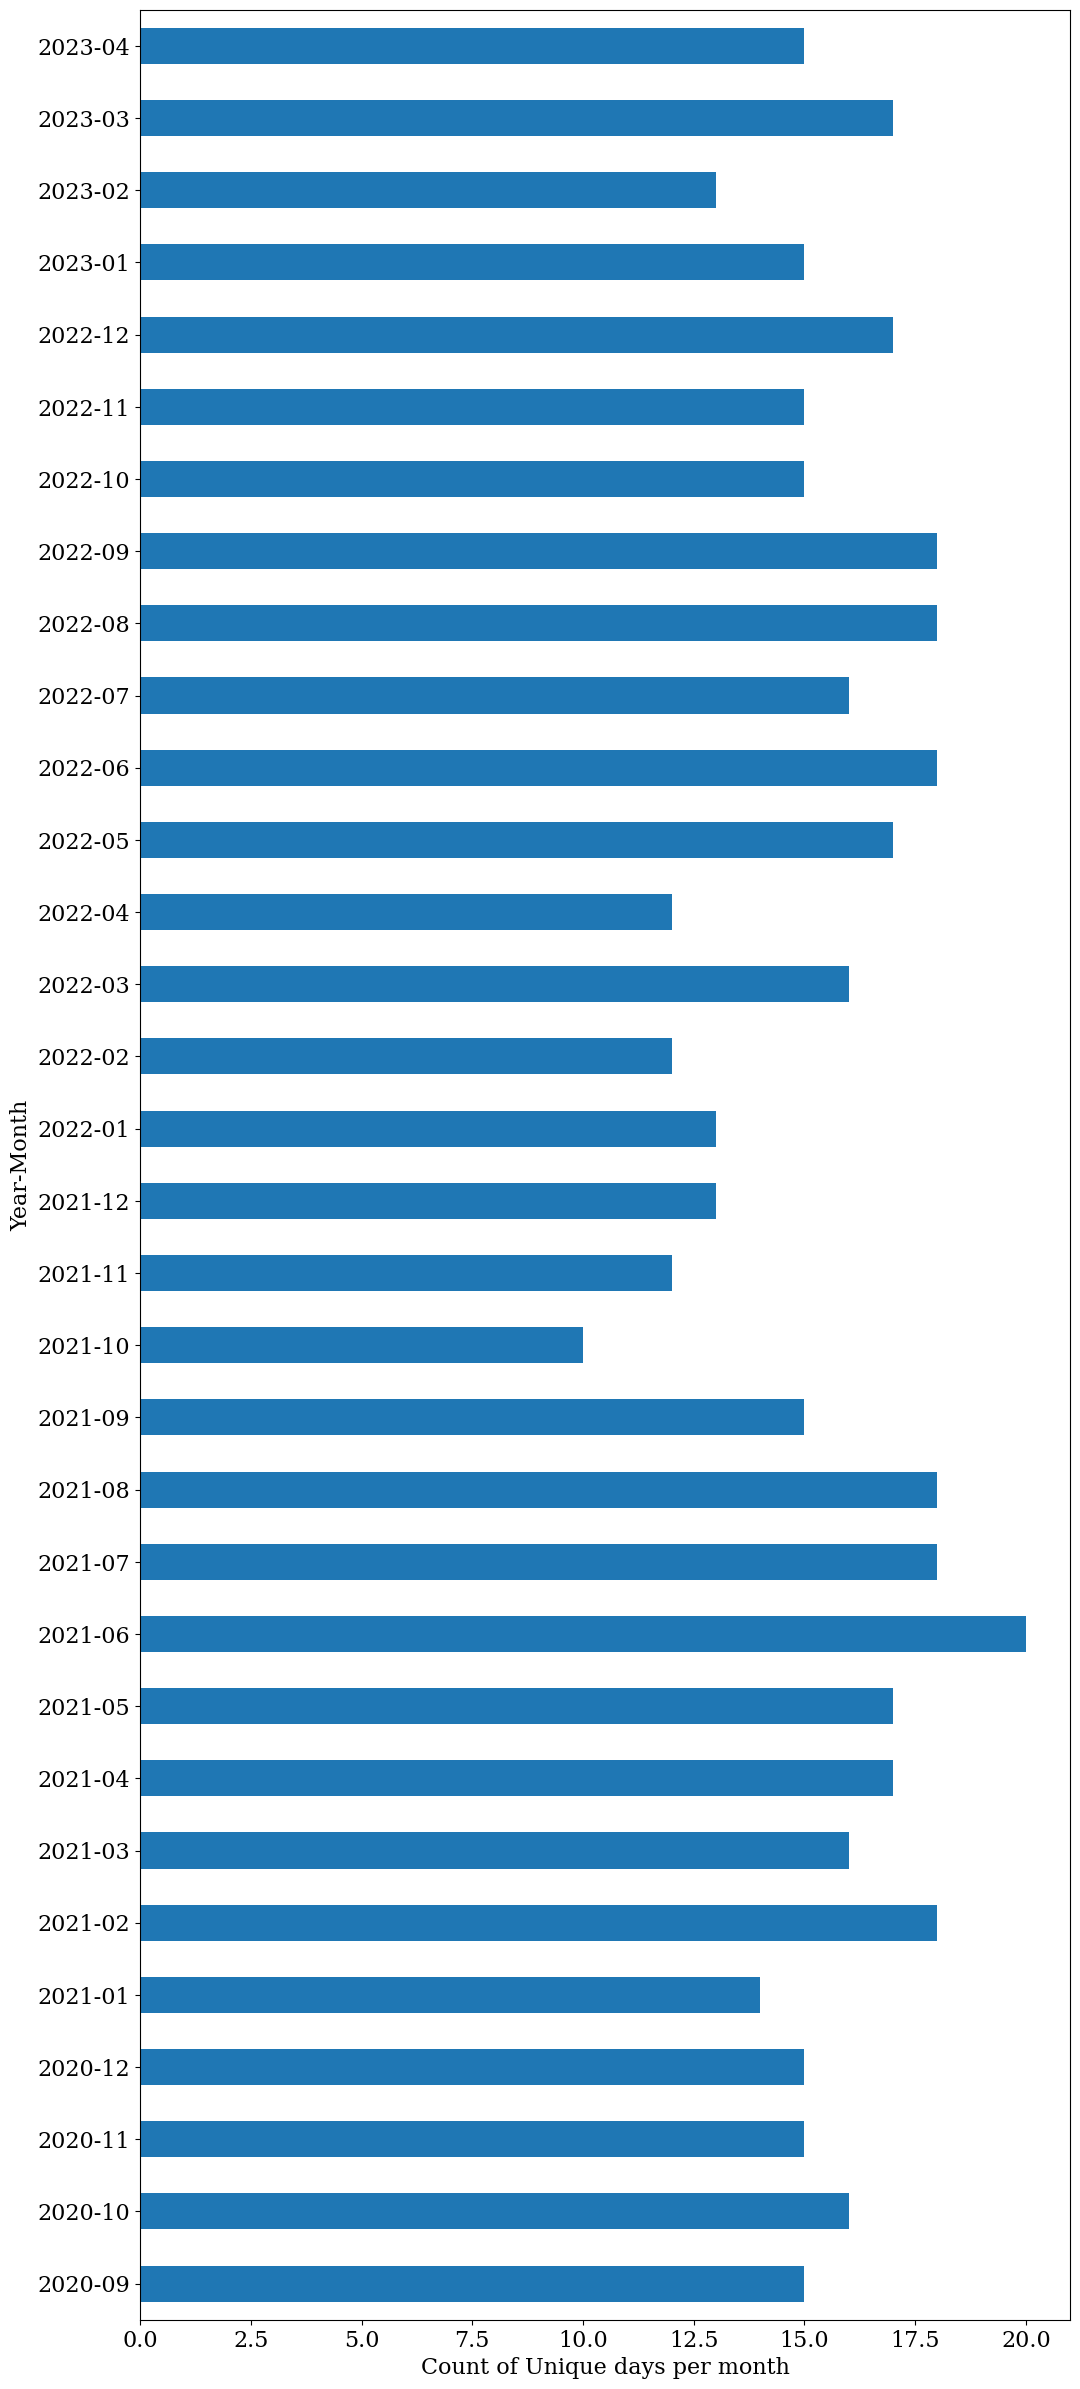

<IPython.core.display.Javascript object>

In [64]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [65]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2020  9        17
      10       26
      11       22
      12       26
2021  1        26
      2        24
      3        27
      4        24
      5        25
      6        28
      7        25
      8        25
      9        19
      10       11
      11       12
      12       13
2022  1        15
      2        18
      3        18
      4        16
      5        26
      6        27
      7        25
      8        27
      9        23
      10       26
      11       26
      12       23
2023  1        25
      2        22
      3        25
      4        18
Name: size, dtype: int64


<IPython.core.display.Javascript object>

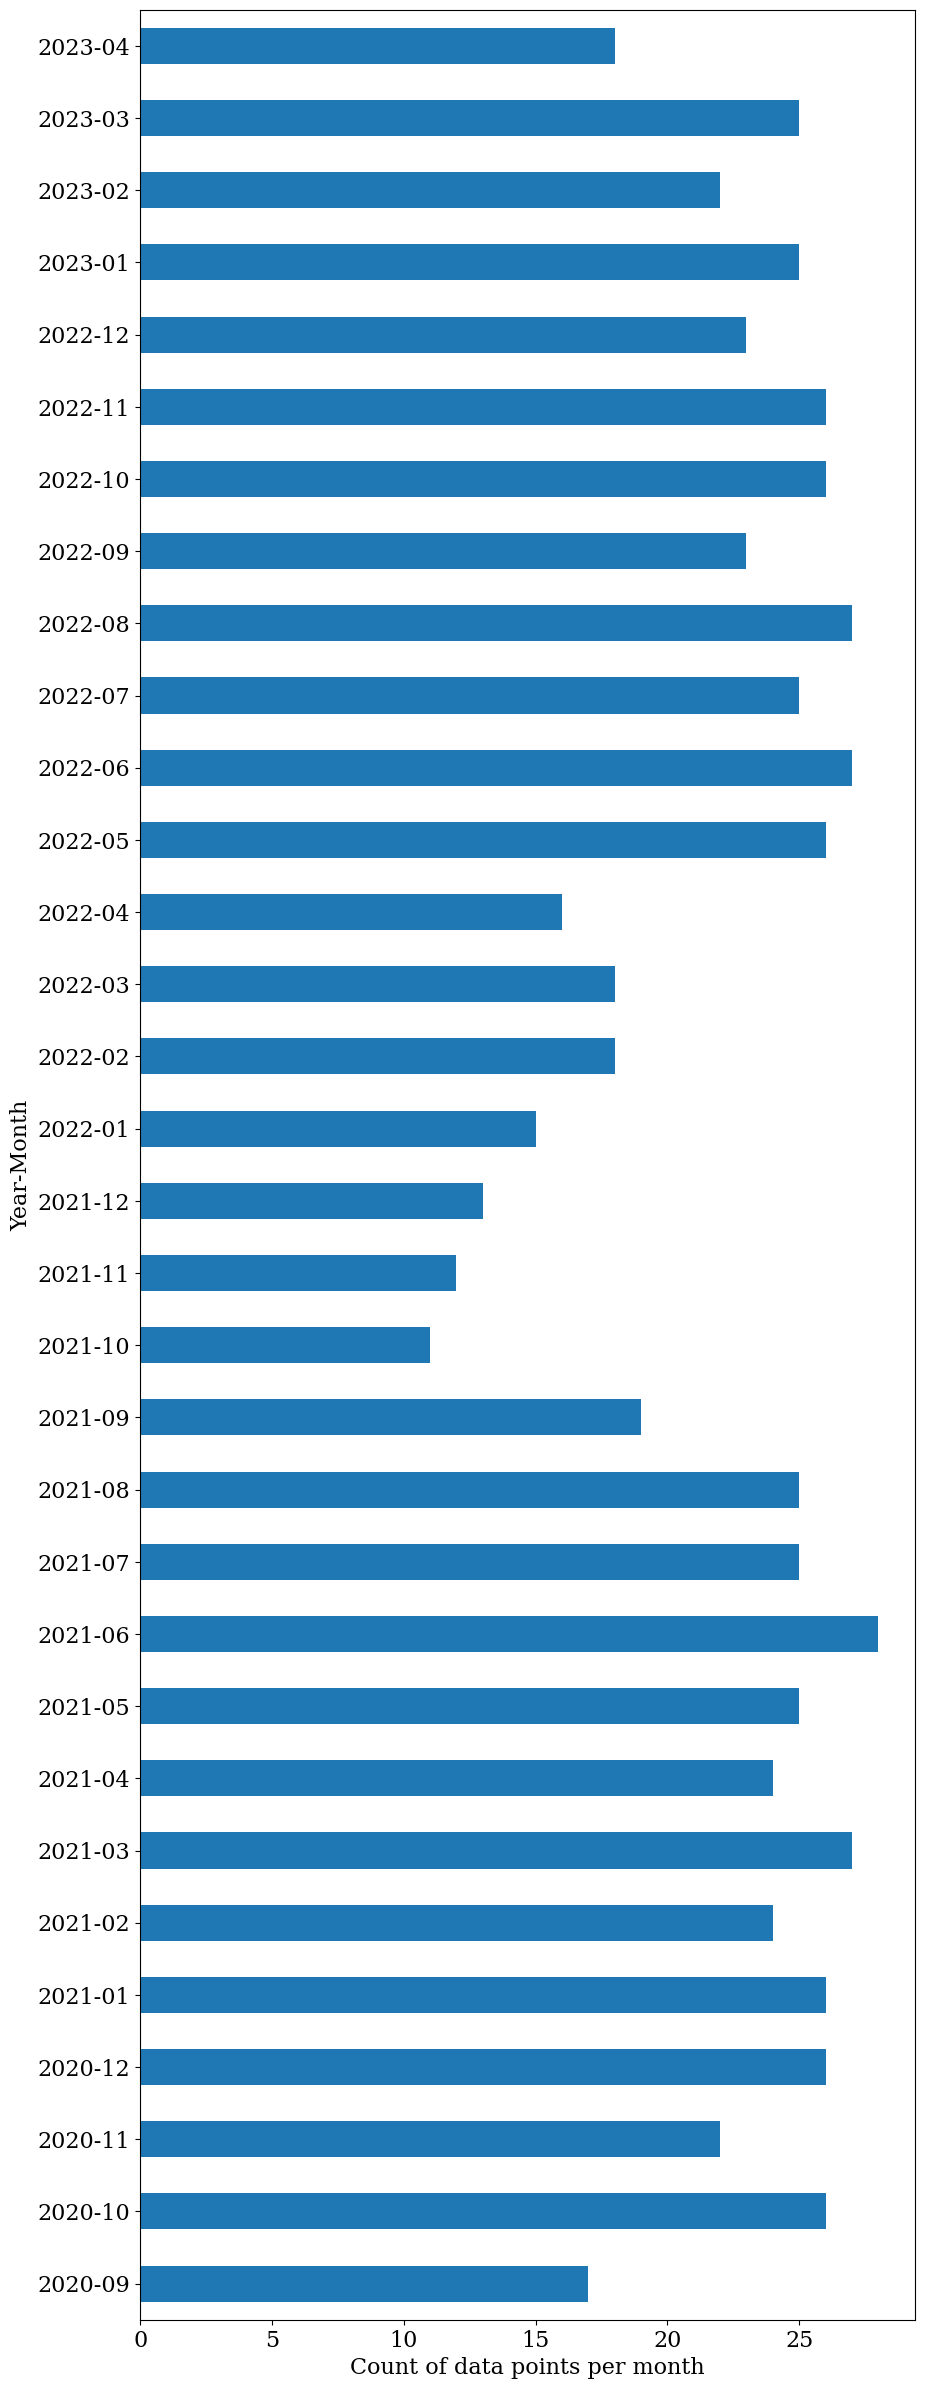

<IPython.core.display.Javascript object>

In [66]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [67]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2021-10 has the minimum number of days with samples - 11
2021-6 has the maximum number of days with samples - 28


<IPython.core.display.Javascript object>

In [68]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2020: 22, 2021: 21, 2022: 22, 2023: 22}

Mean number of observations - all years
22


<IPython.core.display.Javascript object>

In [69]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  496.000000
mean     1.431452
std      0.553537
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      3.000000

<IPython.core.display.Javascript object>

In [70]:
day_counts[["DayCount"]].value_counts()

DayCount
1           297
2           184
3            15
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [71]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
69   2021      1   18         3
121  2021      4   22         3
265  2022      2    8         3
318  2022      5   31         3
332  2022      6   23         3
347  2022      7   19         3
394  2022     10   11         3
400  2022     10   25         3
407  2022     11    8         3
408  2022     11    9         3
418  2022     11   29         3
437  2023      1    4         3
450  2023      1   31         3
471  2023      3   14         3
478  2023      3   28         3

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

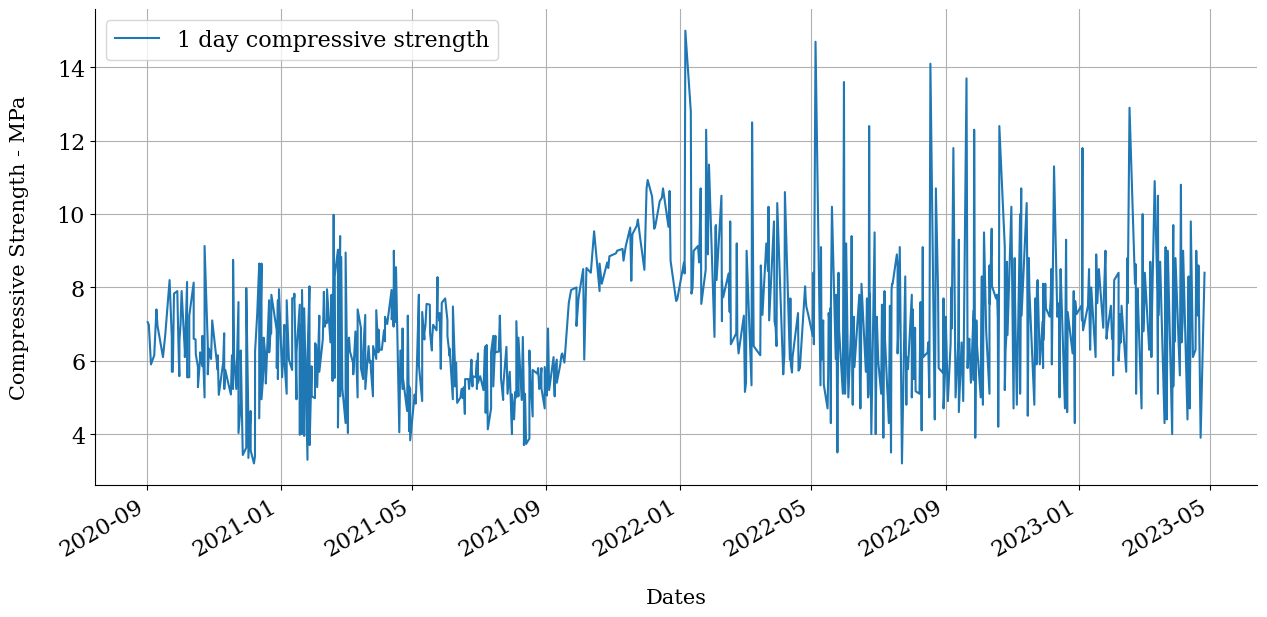

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

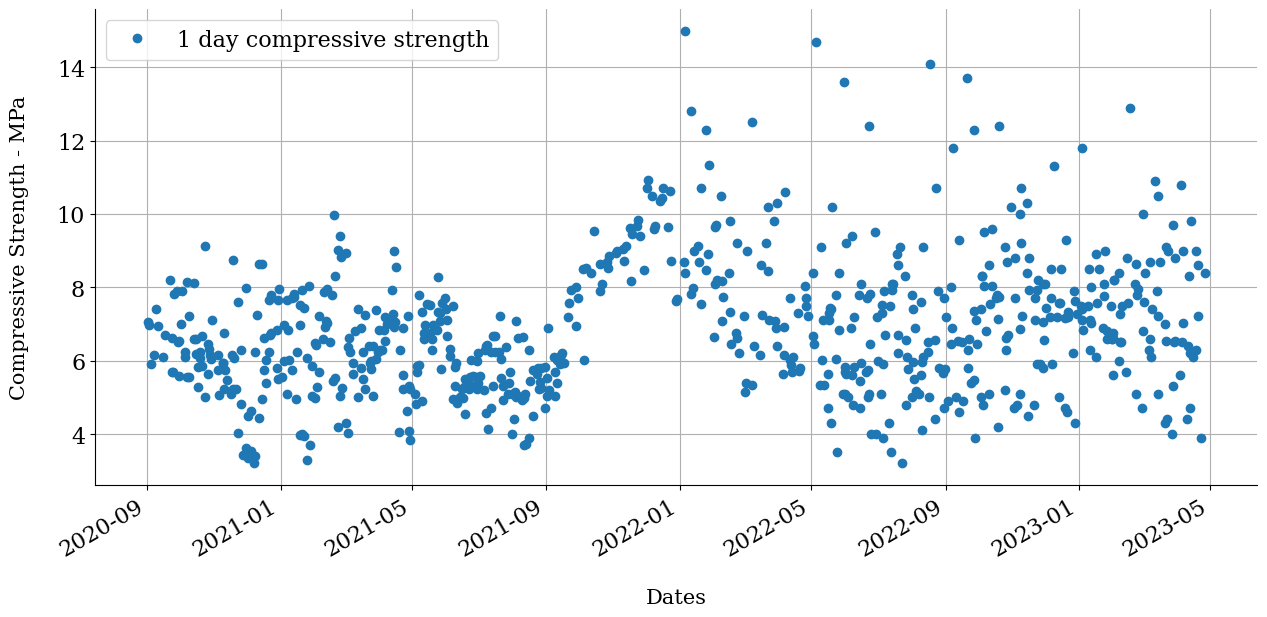

<IPython.core.display.Javascript object>

In [73]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

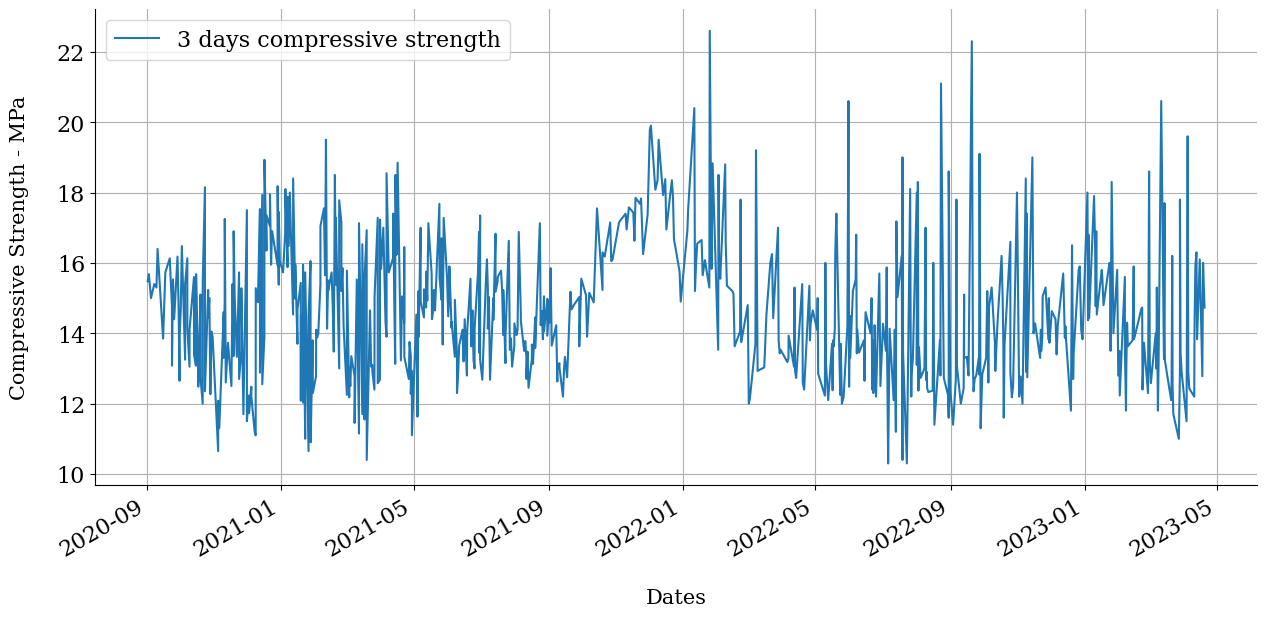

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

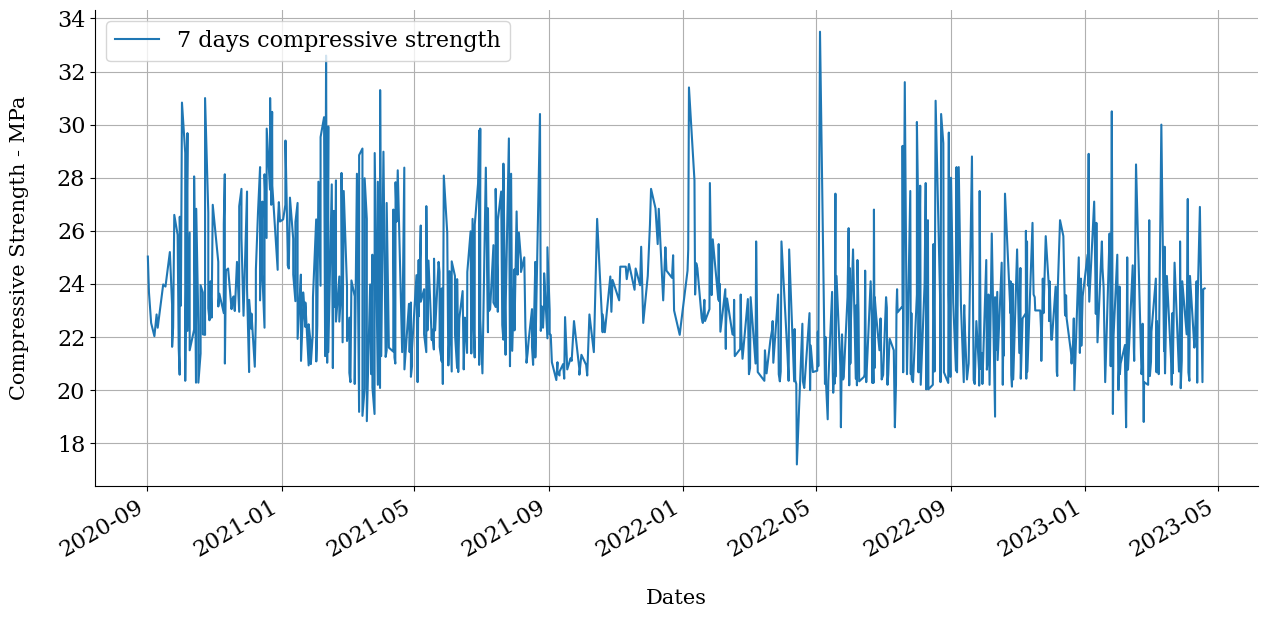

<IPython.core.display.Javascript object>

In [75]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

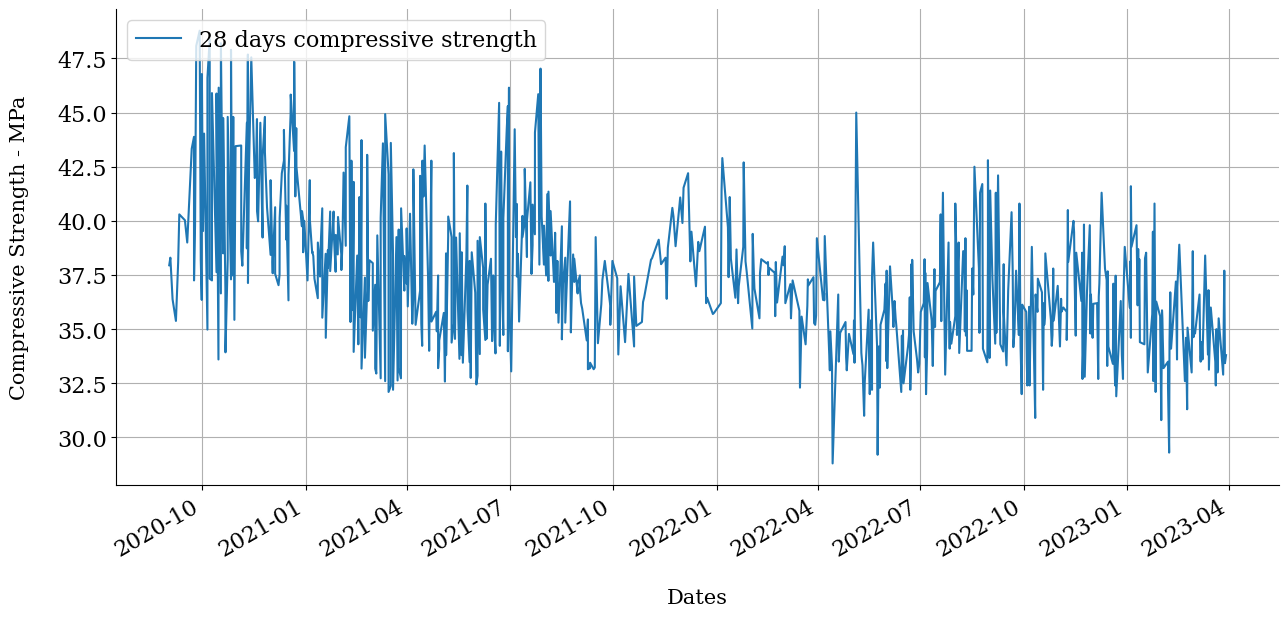

<IPython.core.display.Javascript object>

In [76]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()